<p style = "font-size : 50px; color : #393e46 ; font-family : 'Calibri Light'; padding: 0 5em 2em 0 ;line-height: 40px "><strong>Airline Passenger Satisfaction</strong></p>

Importing libraries

In [10]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [11]:
path="C:\\Users\\mahim\\Downloads\\Python Final Project Group 1 (830-1130)"

Reading the dataset

In [12]:
df = pd.read_csv(path + '\\airline_passenger_satisfaction.csv')

In [13]:
#glimpse of the data
df.head()

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0  ...                 3             5                 2            5   
1  ...                 5             4                 5            5   
2  ...                 3             5                 3            5   
3  ...                 5             5                 5            4   
4  ...                 3             4                 4            5   

   Food and Drink  In-flight Service  In-flight Wifi Service  \
0               5                  5                       3   
1               3                  5                       2   
2               5                  3                       4   
3               4                  5                       2   
4               4                  3                       3   

   In-flight Entertainment  Baggage Handling             Satisfaction  
0                        5                 5  Neutral or Dissatisfied  
1                        5                 5                Satisfied  
2                        3                 3                Satisfied  
3                        5                 5                Satisfied  
4                        3                 3                Satisfied  

[5 rows x 24 columns]

In [14]:
#shape of data
df.shape

(129880, 24)

__BASIC DATA CLEANING__

Univariate Analysis : Here, we look at different characteristics in the each variable of the dataset such as : Minimum value, Maximum value, Interquartile range, Range, Standard deviation, Mean, Percentile values, Missing percentage. This is used to filter variables using 2 basic criteria : (i) A variable should not have more than or equal to 99% values missing. (ii) There should be enough variability in it, i.e. 1st Perecntile value should not be equal to 99th percentile value.  

Performing Univariate Analysis for continuous variables: 


In [15]:
x = [x for x in df.columns if df[x].dtypes != 'object' and x!='ID']

In [16]:
#data_numeric contains only the numeric columns present in the dataset
data_numeric = df[x]

In [17]:
data_numeric.head()

Age  Flight Distance  Departure Delay  Arrival Delay  \
0   48              821                2            5.0   
1   35              821               26           39.0   
2   41              853                0            0.0   
3   50             1905                0            0.0   
4   49             3470                0            1.0   

   Departure and Arrival Time Convenience  Ease of Online Booking  \
0                                       3                       3   
1                                       2                       2   
2                                       4                       4   
3                                       2                       2   
4                                       3                       3   

   Check-in Service  Online Boarding  Gate Location  On-board Service  \
0                 4                3              3                 3   
1                 3                5              2                 5   
2                 4                5              4                 3   
3                 3                4              2                 5   
4                 3                5              3                 3   

   Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
0             5                 2            5               5   
1             4                 5            5               3   
2             5                 3            5               5   
3             5                 5            4               4   
4             4                 4            5               4   

   In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
0                  5                       3                        5   
1                  5                       2                        5   
2                  3                       4                        3   
3                  5                       2                        5   
4                  3                       3                        3   

   Baggage Handling  
0                 5  
1                 5  
2                 3  
3                 5  
4                 3

In [18]:
#Range is the difference between the maximum and minimum value in the data for a single variable.
def Range(y):
            minimum = np.min(y)
            maximum = np.max(y)
            rng = maximum-minimum
            return rng

Rnge = data_numeric.apply(Range)

In [19]:
#Inter-quartile range is the difference between the 75th percentile and 25th percentile.
def iqr(y):
           x25 = np.nanpercentile(y,25)
           x75 = np.nanpercentile(y,75)
           Iqr = x75 - x25
           return Iqr

iQr = data_numeric.apply(iqr)

In [20]:
#Levels are the number of unique values present in a single variable.
def level(y):
            no_of_levels = len(y.unique())
            return no_of_levels

nlevels = data_numeric.apply(level)

In [21]:
#Other measures
mean = data_numeric.apply(np.mean)
median = data_numeric.apply(np.nanmedian,)
stdv = data_numeric.apply(np.std)
missingno = data_numeric.isnull().sum()
missingper=(missingno/data_numeric.shape[0])*100
count = data_numeric.count()

In [22]:
#Calculating minimum and maximum value of every column:

minimum=data_numeric.apply(np.min)
maximum=data_numeric.apply(np.max)

In [23]:
#Percentiles
p1  = data_numeric.quantile(0.01)
p5  = data_numeric.quantile(0.05)
p10 = data_numeric.quantile(0.10)
p20 = data_numeric.quantile(0.20)
p30 = data_numeric.quantile(0.30)
p40 = data_numeric.quantile(0.40)
p50 = data_numeric.quantile(0.50)
p60 = data_numeric.quantile(0.60)
p70 = data_numeric.quantile(0.70)
p80 = data_numeric.quantile(0.80)
p90 = data_numeric.quantile(0.90)
p95 = data_numeric.quantile(0.95)
p99 = data_numeric.quantile(0.99)

In [24]:
Frame = [Rnge,minimum, maximum, p1,p5,p10,p20,p30,p40,p50,p60,p70,p80,p90,p95,p99,iQr,nlevels,mean,median,stdv,missingno,missingper,count]

#Creating a dataframe, it will contain all the results we have derived here.
unistat_numeric = pd.concat(Frame,axis =1)
unistat_numeric.columns = ['Range','minimum','maximum','p1','p5','p10','p20','p30','p40','p50','p60','p70','p80','p90','p95','p99','IQR','nlevels','mean','median','stdv','MissingValue','Missing_perc','# of observations']

In [25]:
unistat_numeric

Range  minimum  maximum     p1  \
Age                                       78.0      7.0     85.0    8.0   
Flight Distance                         4952.0     31.0   4983.0  101.0   
Departure Delay                         1592.0      0.0   1592.0    0.0   
Arrival Delay                           1584.0      0.0   1584.0    0.0   
Departure and Arrival Time Convenience     5.0      0.0      5.0    0.0   
Ease of Online Booking                     5.0      0.0      5.0    0.0   
Check-in Service                           5.0      0.0      5.0    1.0   
Online Boarding                            5.0      0.0      5.0    0.0   
Gate Location                              5.0      0.0      5.0    1.0   
On-board Service                           5.0      0.0      5.0    1.0   
Seat Comfort                               5.0      0.0      5.0    1.0   
Leg Room Service                           5.0      0.0      5.0    1.0   
Cleanliness                                5.0      0.0      5.0    1.0   
Food and Drink                             5.0      0.0      5.0    1.0   
In-flight Service                          5.0      0.0      5.0    1.0   
In-flight Wifi Service                     5.0      0.0      5.0    0.0   
In-flight Entertainment                    5.0      0.0      5.0    1.0   
Baggage Handling                           4.0      1.0      5.0    1.0   

                                            p5    p10    p20    p30    p40  \
Age                                      15.00   20.0   25.0   30.0   36.0   
Flight Distance                         176.95  236.0  358.0  483.0  631.0   
Departure Delay                           0.00    0.0    0.0    0.0    0.0   
Arrival Delay                             0.00    0.0    0.0    0.0    0.0   
Departure and Arrival Time Convenience    0.00    1.0    1.0    2.0    3.0   
Ease of Online Booking                    1.00    1.0    1.0    2.0    2.0   
Check-in Service                          1.00    1.0    2.0    3.0    3.0   
Online Boarding                           1.00    1.0    2.0    3.0    3.0   
Gate Location                             1.00    1.0    2.0    2.0    3.0   
On-board Service                          1.00    1.0    2.0    3.0    3.0   
Seat Comfort                              1.00    1.0    2.0    3.0    3.0   
Leg Room Service                          1.00    1.0    2.0    3.0    3.0   
Cleanliness                               1.00    1.0    2.0    3.0    3.0   
Food and Drink                            1.00    1.0    2.0    2.0    3.0   
In-flight Service                         1.00    2.0    3.0    3.0    4.0   
In-flight Wifi Service                    1.00    1.0    1.0    2.0    2.0   
In-flight Entertainment                   1.00    1.0    2.0    3.0    3.0   
Baggage Handling                          1.00    2.0    3.0    3.0    4.0   

                                          p50  ...     p95     p99     IQR  \
Age                                      40.0  ...    64.0    70.0    24.0   
Flight Distance                         844.0  ...  3380.0  3884.0  1330.0   
Departure Delay                           0.0  ...    77.0   180.0    12.0   
Arrival Delay                             0.0  ...    78.0   182.0    13.0   
Departure and Arrival Time Convenience    3.0  ...     5.0     5.0     2.0   
Ease of Online Booking                    3.0  ...     5.0     5.0     2.0   
Check-in Service                          3.0  ...     5.0     5.0     1.0   
Online Boarding                           3.0  ...     5.0     5.0     2.0   
Gate Location                             3.0  ...     5.0     5.0     2.0   
On-board Service                          4.0  ...     5.0     5.0     2.0   
Seat Comfort                              4.0  ...     5.0     5.0     3.0   
Leg Room Service                          4.0  ...     5.0     5.0     2.0   
Cleanliness                               3.0  ...     5.0     5.0     2.0   
Food and Drink                          

In [26]:
#Making a missing criteria flag, which is 0 when more than 99% values in a column are missing and 1 otherwise.
unistat_numeric['Missing_criteria_flag'] = np.where(unistat_numeric['Missing_perc']>99,0,1)

In [27]:
#Making a variability flag, which is 1 when 1st percentile(p1) != 99th percentile(p99) and 0 otherwise.
unistat_numeric['Variability_flag'] = np.where(unistat_numeric['p1']==unistat_numeric['p99'],0,1)

In [28]:
#Selecting a variable if both flags are 1. 
unistat_numeric['Select'] = np.where((unistat_numeric['Missing_criteria_flag']==1)&(unistat_numeric['Variability_flag']==1),1,0)

In [29]:
unistat_numeric.head(1)

Range  minimum  maximum   p1    p5   p10   p20   p30   p40   p50  ...  \
Age   78.0      7.0     85.0  8.0  15.0  20.0  25.0  30.0  36.0  40.0  ...   

     nlevels       mean  median       stdv  MissingValue  Missing_perc  \
Age       75  39.427957    40.0  15.119302             0           0.0   

     # of observations  Missing_criteria_flag  Variability_flag  Select  
Age             129880                      1                 1       1  

[1 rows x 27 columns]

In [30]:
unistat_numeric.to_csv(path + 'univariate_analysis.csv')

Performing Univariate Analysis for categorical variables:

In [31]:
x = [x for x in df.columns if df[x].dtypes == 'object']

In [32]:
#data_categorical contains only the categorical columns present in the dataset
data_categorical = df[x]

In [33]:
data_categorical.head()

Gender Customer Type Type of Travel     Class             Satisfaction
0    Male    First-time       Business  Business  Neutral or Dissatisfied
1  Female     Returning       Business  Business                Satisfied
2    Male     Returning       Business  Business                Satisfied
3    Male     Returning       Business  Business                Satisfied
4  Female     Returning       Business  Business                Satisfied

In [34]:
#Levels are the number of unique values present in a single variable.
def level(y):
            no_of_levels = len(y.unique())
            return no_of_levels

nlevels = data_categorical.apply(level)

In [35]:
#Other measures
missingno = data_categorical.isnull().sum()
missingper=(missingno/data_categorical.shape[0])*100
count = data_categorical.count()

In [36]:
Frame = [nlevels,missingno,missingper,count]

#Creating a dataframe, it will contain all the results we have derived here.
unistat_categorical = pd.concat(Frame,axis =1)
unistat_categorical.columns = ['nlevels','MissingValue','Missing_perc','# of observations']

In [37]:
unistat_categorical.head(1)

nlevels  MissingValue  Missing_perc  # of observations
Gender        2             0           0.0             129880

In [38]:
#Making a missing criteria flag, which is 0 when more than 99% values in a column are missing and 1 otherwise.
unistat_categorical['Missing_criteria_flag'] = np.where(unistat_categorical['Missing_perc']>99,0,1)

In [39]:
unistat_categorical['Variability_flag'] = np.where(((unistat_categorical['nlevels']<2) | (unistat_categorical['nlevels']>500)) , 0, 1)

In [40]:
#Selecting a variable if both flags are 1. 
unistat_categorical['Select'] = np.where((unistat_categorical['Missing_criteria_flag']==1)&(unistat_categorical['Variability_flag']==1),1,0)

In [41]:
unistat_categorical

nlevels  MissingValue  Missing_perc  # of observations  \
Gender                2             0           0.0             129880   
Customer Type         2             0           0.0             129880   
Type of Travel        2             0           0.0             129880   
Class                 3             0           0.0             129880   
Satisfaction          2             0           0.0             129880   

                Missing_criteria_flag  Variability_flag  Select  
Gender                              1                 1       1  
Customer Type                       1                 1       1  
Type of Travel                      1                 1       1  
Class                               1                 1       1  
Satisfaction                        1                 1       1

There are no numeric or categorical variables that we can remove after doing the univariate analysis, hence we take the entire data (all columns) going forward.

Missing value Treatment

In [42]:
#There are null in only one column : Arrival Delay
#Only 0.3% of the data in the variable Arrival Delay is missing. 
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [43]:
#Replacing the null values in Arrival delay column with mean value.
df['Arrival Delay'].fillna(df['Arrival Delay'].mean(), inplace=True)

In [44]:
#There are no nulls in the data now.
df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

Outlier Treatment

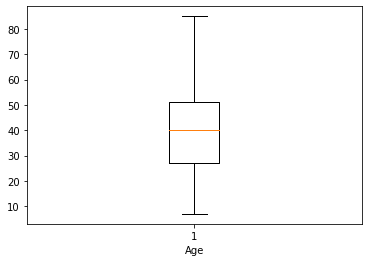

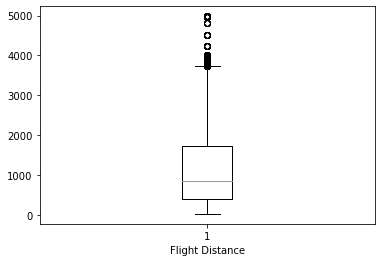

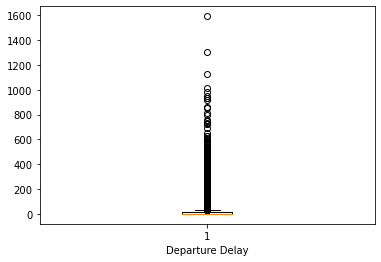

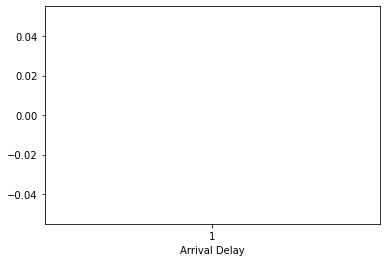

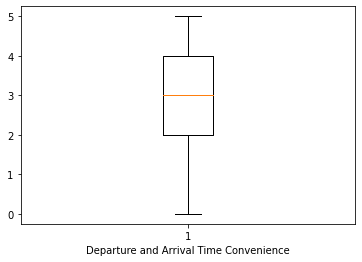

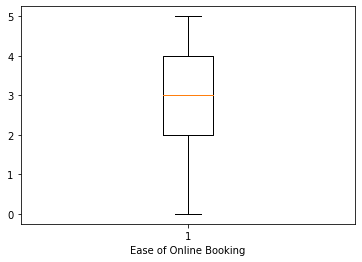

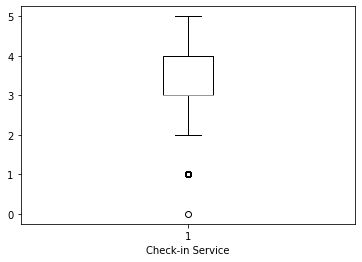

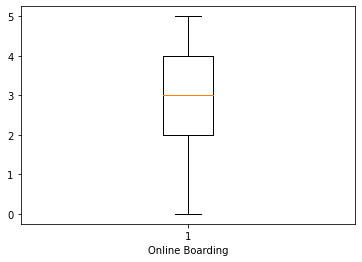

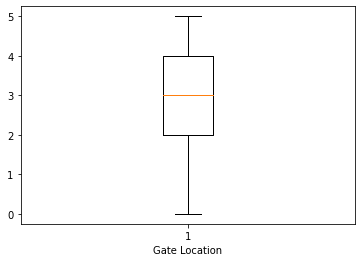

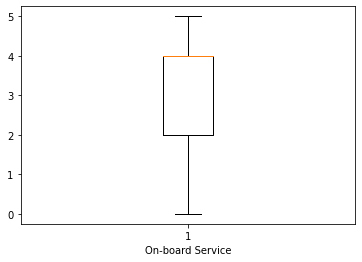

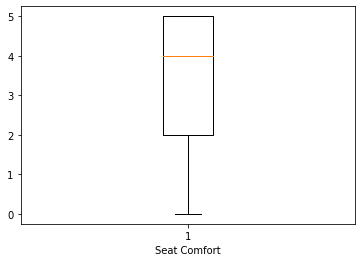

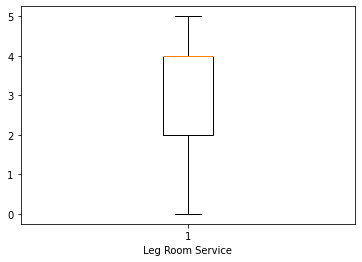

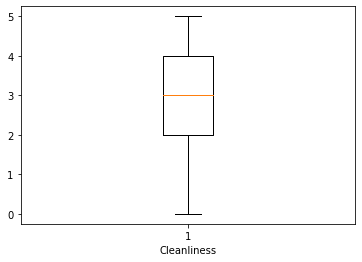

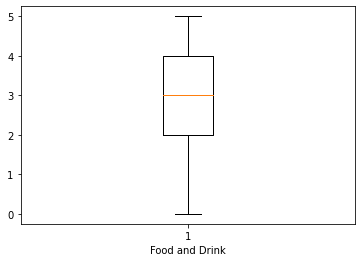

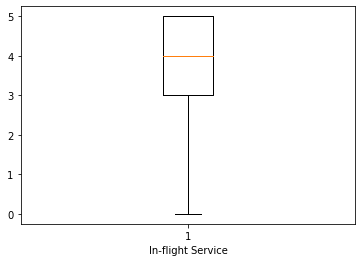

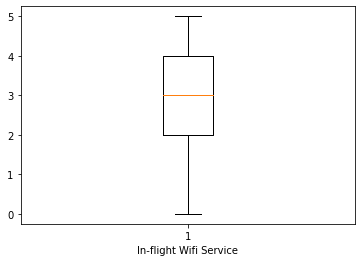

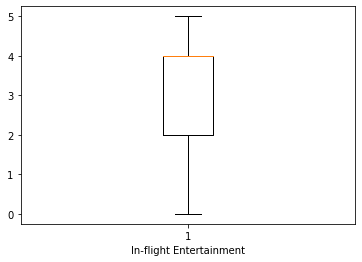

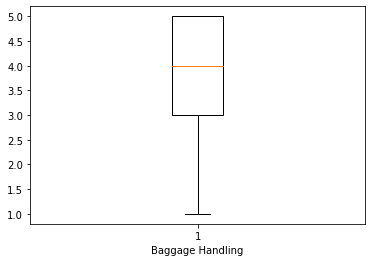

In [45]:
#Box plot of outliers for each numeric variable in the data: 

for i in data_numeric.columns[0:]:
    plt.boxplot(x=data_numeric[i])
    plt.axis('on')
    plt.xlabel(i)
    plt.show()

In [46]:
#To treat outliers, we can do flooring and capping (except for the rating columns:

#Replacing values less than 5th percentile with the 5th percentile (Flooring).
#Replacing values greater than 95th percentile with 95th percentile (Capping).

#Over here, since we are doing exploratory data analysis, we will not conduct outlier treatment.

Replacing label column "satisfaction" values with 0 and 1 (neutral or dissatisfied = 0 and satisfied = 1) 

In [47]:
df['Y'] = np.where(df['Satisfaction']=='Satisfied',1,0)

In [48]:
df_copy=df.copy()

In [49]:
df.head()

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
0  ...             5                 2            5               5   
1  ...             4                 5            5               3   
2  ...             5                 3            5               5   
3  ...             5                 5            4               4   
4  ...             4                 4            5               4   

   In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
0                  5                       3                        5   
1                  5                       2                        5   
2                  3                       4                        3   
3                  5                       2                        5   
4                  3                       3                        3   

   Baggage Handling             Satisfaction  Y  
0                 5  Neutral or Dissatisfied  0  
1                 5                Satisfied  1  
2                 3                Satisfied  1  
3                 5                Satisfied  1  
4                 3                Satisfied  1  

[5 rows x 25 columns]

__Y VARIABLE ANALYSIS__

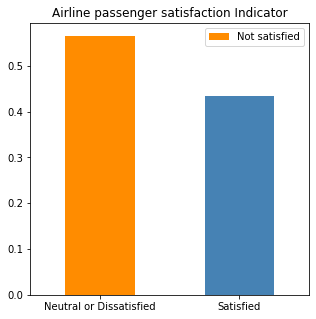

In [50]:
#The plot shows a distribution of around 55:45 between neutral/dissatisfied passengers and satisfied passengers respectively. 

fig = plt.figure(figsize = (5,5))
df['Satisfaction'].value_counts(normalize = True).plot(kind='bar', color=['darkorange','steelblue'], rot=0)
plt.title('Airline passenger satisfaction Indicator')
plt.legend(["Not satisfied","Satified"],loc="upper right")
plt.show()

In [51]:
#Making age brackets that can be used further in the analysis

bins=[5,15,25,45,60]
labels=['Teens','GenZs','Millennials','Old']
df['AgeGroup']=pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.head()

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  Leg Room Service  Cleanliness  Food and Drink  In-flight Service  \
0  ...                 2            5               5                  5   
1  ...                 5            5               3                  5   
2  ...                 3            5               5                  3   
3  ...                 5            4               4                  5   
4  ...                 4            5               4                  3   

   In-flight Wifi Service  In-flight Entertainment  Baggage Handling  \
0                       3                        5                 5   
1                       2                        5                 5   
2                       4                        3                 3   
3                       2                        5                 5   
4                       3                        3                 3   

              Satisfaction  Y     AgeGroup  
0  Neutral or Dissatisfied  0          Old  
1                Satisfied  1  Millennials  
2                Satisfied  1  Millennials  
3                Satisfied  1          Old  
4                Satisfied  1          Old  

[5 rows x 26 columns]

__EXPLORATORY DATA ANALYSIS__

<font color='red'>__How does satisfaction among age groups vary with ease of online booking and check in service?__</font>

(i) __Ease of online booking__

In [52]:
df.head(1)

ID Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1   Male   48    First-time       Business  Business              821   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   

   ...  Leg Room Service  Cleanliness  Food and Drink  In-flight Service  \
0  ...                 2            5               5                  5   

   In-flight Wifi Service  In-flight Entertainment  Baggage Handling  \
0                       3                        5                 5   

              Satisfaction  Y  AgeGroup  
0  Neutral or Dissatisfied  0       Old  

[1 rows x 26 columns]

In [53]:
#Creating pivot table 

df_onlinebooking_pivot = df.groupby('Ease of Online Booking')['Y'].agg(['count'])
df_onlinebooking_pivot.rename(columns={'count': 'Population'}, inplace=True)
df_onlinebooking_pivot['perc_Population']= round(df_onlinebooking_pivot['Population'] / sum(df_onlinebooking_pivot['Population']) * 100,2)
df_onlinebooking_pivot.reset_index(inplace=True)
df_onlinebooking_pivot

Ease of Online Booking  Population  perc_Population
0                       0        5682             4.37
1                       1       21886            16.85
2                       2       30051            23.14
3                       3       30393            23.40
4                       4       24444            18.82
5                       5       17424            13.42

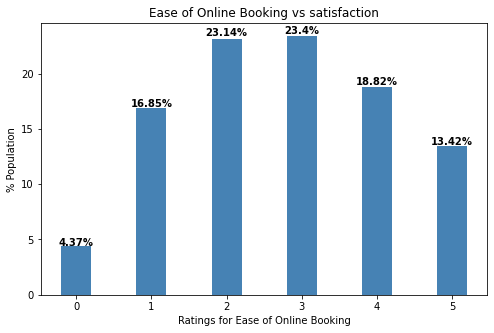

In [54]:
#Creating bar chart

fig = plt.figure(figsize = (8, 5))
graph = plt.bar(df_onlinebooking_pivot['Ease of Online Booking'].astype(str), df_onlinebooking_pivot['perc_Population'], color ='steelblue', width = 0.4)
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
     
    plt.text(x+width/2,
             y+height*1.01,
             str(df_onlinebooking_pivot.perc_Population[i])+'%',
             ha='center',
             weight='bold')
    i += 1
plt.xlabel("Ratings for Ease of Online Booking")
plt.ylabel("% Population")
plt.title("Ease of Online Booking vs satisfaction")
plt.show()

The above graph is more or less normally distributed, maximum percentage of people have rated the ease of booking as just near to satisfactory with a rating of 2 or 3. 

We will further deep dive into this and find the relationship of airline satisfaction levels with age group of customers. 

In [55]:
#Segregating dataframe according to age groups:

df_Teens = df[df['AgeGroup']=='Teens']
df_GenZs = df[df['AgeGroup']=='GenZs']
df_Millennials = df[df['AgeGroup']=='Millennials']
df_Old = df[df['AgeGroup']=='Old']

In [56]:
#Creating pivot tables for various age groups

#Teens
df_Teens_pivot = df_Teens.groupby('Ease of Online Booking')['Y'].agg(['count'])
df_Teens_pivot.rename(columns={'count': 'Population'}, inplace=True)
df_Teens_pivot['% Population']= round(df_Teens_pivot['Population'] / sum(df_Teens_pivot['Population']) * 100,2)
df_Teens_pivot.reset_index(inplace=True)

#GenZs
df_GenZs_pivot = df_GenZs.groupby('Ease of Online Booking')['Y'].agg(['count'])
df_GenZs_pivot.rename(columns={'count': 'Population'}, inplace=True)
df_GenZs_pivot['% Population']= round(df_GenZs_pivot['Population'] / sum(df_GenZs_pivot['Population']) * 100,2)
df_GenZs_pivot.reset_index(inplace=True)

#Millennials
df_Millennials_pivot = df_Millennials.groupby('Ease of Online Booking')['Y'].agg(['count'])
df_Millennials_pivot.rename(columns={'count': 'Population'}, inplace=True)
df_Millennials_pivot['% Population']= round(df_Millennials_pivot['Population'] / sum(df_Millennials_pivot['Population']) * 100,2)
df_Millennials_pivot.reset_index(inplace=True)

#Old
df_Old_pivot = df_Old.groupby('Ease of Online Booking')['Y'].agg(['count'])
df_Old_pivot.rename(columns={'count': 'Population'}, inplace=True)
df_Old_pivot['% Population']= round(df_Old_pivot['Population'] / sum(df_Old_pivot['Population']) * 100,2)
df_Old_pivot.reset_index(inplace=True)

In [57]:
#An example pivot table
df_Teens_pivot

Ease of Online Booking  Population  % Population
0                       0         339          5.25
1                       1        1081         16.73
2                       2        1731         26.80
3                       3        1747         27.04
4                       4        1066         16.50
5                       5         496          7.68

(0.0, 100.0)

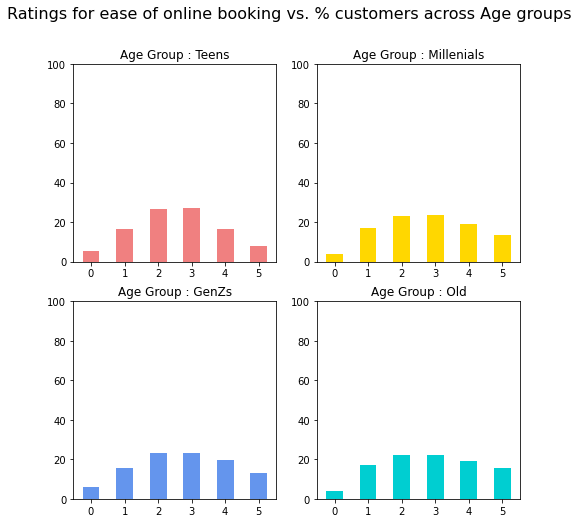

In [58]:
fig, axs = plt.subplots(2, 2, figsize = (8,8), sharey='col' )
fig.suptitle('Ratings for ease of online booking vs. % customers across Age groups', fontsize=16)

axs[0, 0].bar(df_Teens_pivot['Ease of Online Booking'].astype(str), df_Teens_pivot['% Population'], color ='lightcoral', width=0.5)
axs[0, 0].set_title("Age Group : Teens")
axs[0, 0].set_ylim(bottom=0, top=100)

axs[1, 0].bar(df_GenZs_pivot['Ease of Online Booking'].astype(str), df_GenZs_pivot['% Population'], color ='cornflowerblue', width=0.5)
axs[1, 0].set_title("Age Group : GenZs")
axs[1, 0].set_ylim(bottom=0, top=100)

axs[0, 1].bar(df_Millennials_pivot['Ease of Online Booking'].astype(str), df_Millennials_pivot['% Population'], color ='gold', width=0.5)
axs[0, 1].set_title("Age Group : Millenials")
axs[0, 1].set_ylim(bottom=0, top=100)

axs[1, 1].bar(df_Old_pivot['Ease of Online Booking'].astype(str), df_Old_pivot['% Population'], color ='darkturquoise', width=0.5)
axs[1, 1].set_title("Age Group : Old")
axs[1, 1].set_ylim(bottom=0, top=100)

The ratings accross all the age groups is consistent with the overall ratings of "Ease of booking" parameter.

The GenZs and millennials are equally unhappy with the service as the elder people. This means that the airline needs to make serious and drastic changes in its online booking service. A good online booking application has many benefits like 24/7 availability for booking, in-app purchases of services in flight, adding baggage, getting a travel insurance which the airline company can take advantage of.

(ii) __Check in service__

In [59]:
#Check-in Service vs Satisfaction
sns.heatmap(pd.crosstab(df['Check-in Service'], df['Satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

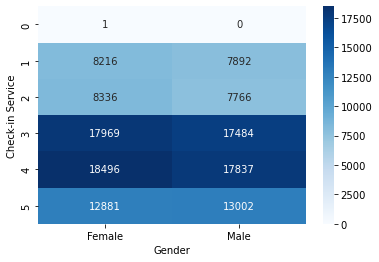

In [60]:
#Check-in Service vs Gender
sns.heatmap(pd.crosstab(df['Check-in Service'], df['Gender']),annot=True, cmap='Blues', cbar=True, fmt="d");

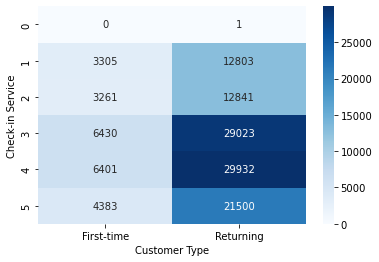

In [61]:
#Check-in Service vs Customer Type
sns.heatmap(pd.crosstab(df['Check-in Service'], df['Customer Type']),annot=True, cmap='Blues', cbar=True, fmt="d");

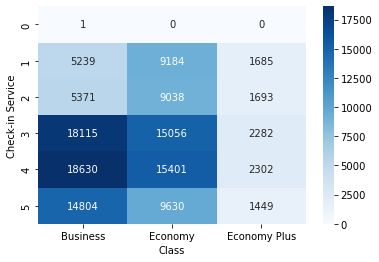

In [62]:
#Check-in Service vs Class
sns.heatmap(pd.crosstab(df['Check-in Service'], df['Class']),annot=True, cmap='Blues', cbar=True, fmt="d");

Maximum of the passengers are overall neutral/satisfied with the airline, and have rated the check-in between 3-4. Overall, no gender disparity is visible for the ratings, as the average ratings is between 3 and 4 for both the genders. More than 75% of the respondents were returning passengers, and the majority of ratings is centred around 3-5. While we throw a look at the type of travel, a majority of the travellers are from the business class, and majority have given a rating of 4. The majority rating of 4 is the same for the Economy and Economy classes both too. Auto Check-in and Mobile Check-in allows airports and airlines to spread the peaks and troughs of passenger arrivals over a long period of time. Airline can also provide baggage weight checking machines, so that there is reduced wait time at the check-in.

<font color='red'>**How does Baggage Handling and Gate Location affect satisfaction?**</font>

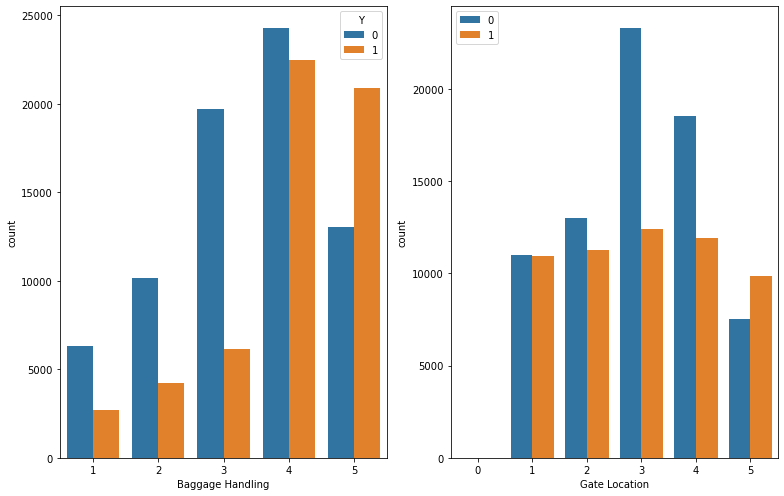

In [63]:
#plotting Graphs for Baggage vs Satisfaction
#Plotting Graph for Gate Location vs Satisfaction
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
sns.countplot('Baggage Handling',data=df,hue='Y')
plt.subplot(1,2,2)
sns.countplot('Gate Location',data=df,hue='Y')
plt.legend(loc='upper left')
plt.tight_layout()

Passengers who rated 4/5 are more relatively more satisfied than passengers who rated less. Similarly the same with Gate location as well.

Baggage handling is an important factor in passenger satisfaction. More and more passengers are now interested in tracking the baggage updates,  https://www.internationalairportreview.com/article/164476/the-importance-of-baggage-handling-systems-in-winning-passengers-and-airlines/. Passengers who track baggage updates through mobiles are 9% more satisfied than passengers who use traditional voice messages. Hence airlines could launch mobile application to track baggage and promote passengers to use the application for better experience.

In [64]:
fig = px.sunburst(df,path=['Type of Travel','Baggage Handling','Y'])
fig.update_traces(textinfo = 'label+percent entry')
fig.show()

<font color='red'>__How does delay affect satisfaction?__</font>

An immediate factor that comes into mind when we think about airline satisfaction is its timeliness. Hence we begin our analysis with arrival and departure delay.

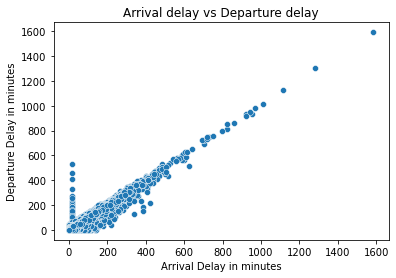

In [65]:
# Arrival Delay and Departure Delay columns are highly positively correlated. 

sns.scatterplot(x=df['Arrival Delay'],y=df['Departure Delay'])
plt.xlabel('Arrival Delay in minutes')
plt.ylabel('Departure Delay in minutes')
plt.title('Arrival delay vs Departure delay')
plt.show()

In [66]:
#Grouping arrival delay into interval groups.

df['Arrival Delay bin']= pd.cut(x=df['Arrival Delay'], bins=[0, 5, 10, 20, 60, 1600], right=False)
df.head()

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  Cleanliness  Food and Drink  In-flight Service  \
0  ...            5               5                  5   
1  ...            5               3                  5   
2  ...            5               5                  3   
3  ...            4               4                  5   
4  ...            5               4                  3   

   In-flight Wifi Service  In-flight Entertainment  Baggage Handling  \
0                       3                        5                 5   
1                       2                        5                 5   
2                       4                        3                 3   
3                       2                        5                 5   
4                       3                        3                 3   

              Satisfaction  Y     AgeGroup  Arrival Delay bin  
0  Neutral or Dissatisfied  0          Old            [5, 10)  
1                Satisfied  1  Millennials           [20, 60)  
2                Satisfied  1  Millennials             [0, 5)  
3                Satisfied  1          Old             [0, 5)  
4                Satisfied  1          Old             [0, 5)  

[5 rows x 27 columns]

In [67]:
#Creating pivot table 

df_arrival_delay_pivot = df.groupby('Arrival Delay bin')['Y'].agg(['sum','count'])
df_arrival_delay_pivot['Not satisfied']=df_arrival_delay_pivot['count']-df_arrival_delay_pivot['sum']
df_arrival_delay_pivot['perc_Satisfied']=round((df_arrival_delay_pivot['sum']/df_arrival_delay_pivot['count'])*100,2)
df_arrival_delay_pivot.rename(columns={'count': 'Population','sum':'Satisfied'}, inplace=True)
df_arrival_delay_pivot.reset_index(inplace=True)
df_arrival_delay_pivot

Arrival Delay bin  Satisfied  Population  Not satisfied  perc_Satisfied
0            [0, 5)      39354       82902          43548           47.47
1           [5, 10)       3500        9215           5715           37.98
2          [10, 20)       4384       12106           7722           36.21
3          [20, 60)       5889       16366          10477           35.98
4        [60, 1600)       3301        9291           5990           35.53

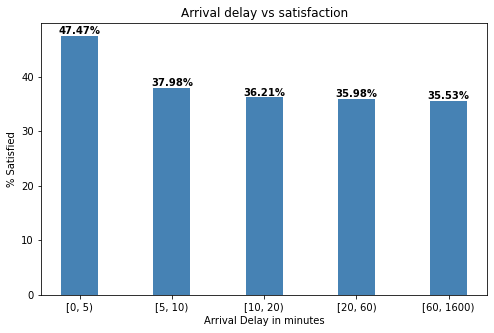

In [68]:
#Creating bar chart

fig = plt.figure(figsize = (8, 5))
graph = plt.bar(df_arrival_delay_pivot['Arrival Delay bin'].astype(str), df_arrival_delay_pivot['perc_Satisfied'], color ='steelblue', width = 0.4)
plt.xlabel("Arrival Delay in minutes")
plt.ylabel("% Satisfied")
plt.title("Arrival delay vs satisfaction")
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(df_arrival_delay_pivot.perc_Satisfied[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

From the above, it is obvious and evident that as the flight arrival time exceeds the ETA, the percentage of people satisfied with the airline decreases. 

16% of US flights were delayed overall in 2021 (https://www.bbc.com/news/business-60228430). Flight delays cost more than just time. A recent whitepaper by Frost & Sullivan found that airlines with high rates of delay also have higher operating costs overall. (flight delays cost airlines approximately $97 per minute). 

__How to reduce airline delays?__

Majority delays are within an airline's control and are a result of inefficient turnaround services - restocking, cleaning, refuelling and luggage on-boarding/removal. Using AI and existing observation cameras, this delay can be detected at the onset, and an alternative mitigation plan can be devised. Parallel boarding is an option, where passengers are boarded while the flight is fueling up (needs a firetruck as safety protocol). Some airlines are also overestimating the travel time, so that it will be able to cover some of the delays while also not extending the arrival time for the passengers.

<font color = 'red'>__How does seat comfort impact the satisfaction levels of passengers?__</font>

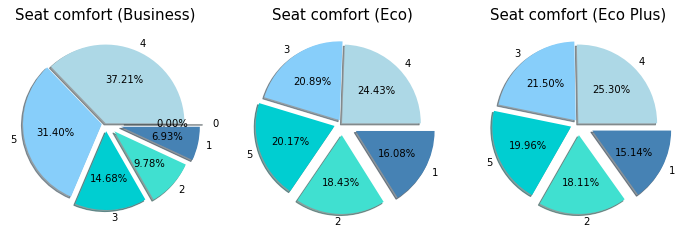

In [69]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.pie(df.loc[df.Class=="Business",'Seat Comfort'].value_counts(),  autopct='%1.2f%%', labels = df.loc[df.Class=="Business",'Seat Comfort'].value_counts().index , explode = (0,0.05,0.1,0.15,0.2,0.25), shadow=True,colors= ["lightblue","lightskyblue",'darkturquoise','turquoise','steelblue'])
plt.title('Seat comfort (Business)', fontsize=15)

plt.subplot(1, 3, 2)
plt.pie(df.loc[df.Class=="Economy",'Seat Comfort'].value_counts(), autopct='%1.2f%%', labels = df.loc[df.Class=="Economy",'Seat Comfort'].value_counts().index, explode = (0,0.05,0.1,0.15,0.2), shadow=True,colors=["lightblue","lightskyblue",'darkturquoise','turquoise','steelblue'])
plt.title('Seat comfort (Eco)', fontsize=15)

plt.subplot(1, 3, 3)
plt.pie(df.loc[df.Class=="Economy Plus",'Seat Comfort'].value_counts(), autopct='%1.2f%%', labels = df.loc[df.Class=="Economy Plus",'Seat Comfort'].value_counts().index, explode = (0,0.05,0.1,0.15,0.2), shadow=True,colors=["lightblue","lightskyblue",'darkturquoise','turquoise','steelblue'])
plt.title('Seat comfort (Eco Plus)', fontsize=15)

plt.show()

Text(0.5, 1.0, 'Seat Comfort vs Overall Satisfaction (Eco Plus)')

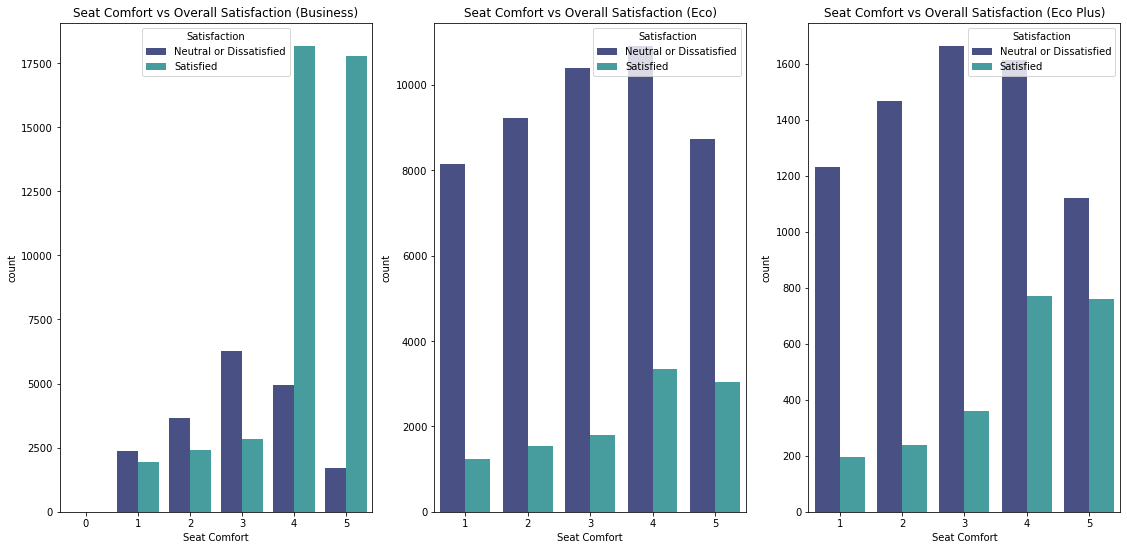

In [70]:
plt.figure(figsize=(19, 9))
plt.subplot(1, 3, 1)
ax = sns.countplot(x = 'Seat Comfort', hue = 'Satisfaction', palette = "mako", data = df[(df.Class == "Business")])
plt.title('Seat Comfort vs Overall Satisfaction (Business)')
plt.subplot(1, 3, 2)
ax = sns.countplot(x = 'Seat Comfort', hue = 'Satisfaction', palette = "mako", data = df[(df.Class == "Economy")])
plt.title('Seat Comfort vs Overall Satisfaction (Eco)')
plt.subplot(1, 3, 3)
ax = sns.countplot(x = 'Seat Comfort', hue = 'Satisfaction', palette = "mako", data = df[(df.Class == "Economy Plus")])
plt.title('Seat Comfort vs Overall Satisfaction (Eco Plus)')

The charts show that the business class passengers are the most satisfied when it comes to seat comfort. Even among the other factors, the business class passengers have rated seat comfort highly. While for the other classes the seat comfort satisfaction is quite low, with more than 50% rating it as 3 or lower. 

Recommendations:

1. Space is premium for any airline and maximum seats have to be created because all will not be willing to pay extravagant business class fares. The only option is to properly design the seats with optimum ergonomics and pleasant fabrics.
2. Seats can be fitted with elevated headrest to give more comfort as this addition will not reduce number of seats.
3. Seats can have built in massagers to give some comfort to passengers during long flights. This will not impact the number of seats.

<font color = 'red'>__How does inflight entertainment impact the satisfaction levels of passengers?__</font>

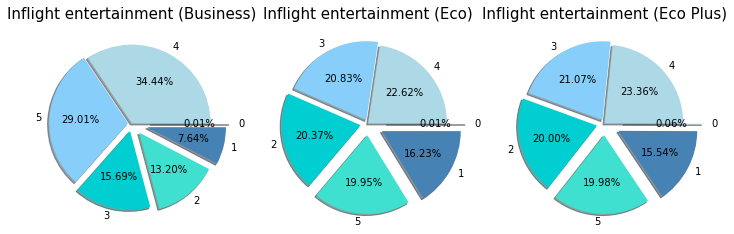

In [71]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.pie(df.loc[df.Class=="Business",'In-flight Entertainment'].value_counts(),  autopct='%1.2f%%', labels = df.loc[df.Class=="Business",'In-flight Entertainment'].value_counts().index , explode = (0,0.05,0.1,0.15,0.2,0.25), shadow=True,colors= ["lightblue","lightskyblue",'darkturquoise','turquoise','steelblue'])
plt.title('Inflight entertainment (Business)', fontsize=15)

plt.subplot(1, 3, 2)
plt.pie(df.loc[df.Class=="Economy",'In-flight Entertainment'].value_counts(), autopct='%1.2f%%', labels = df.loc[df.Class=="Economy",'In-flight Entertainment'].value_counts().index, explode = (0,0.05,0.1,0.15,0.2,0.25), shadow=True,colors=["lightblue","lightskyblue",'darkturquoise','turquoise','steelblue'])
plt.title('Inflight entertainment (Eco)', fontsize=15)

plt.subplot(1, 3, 3)
plt.pie(df.loc[df.Class=="Economy Plus",'In-flight Entertainment'].value_counts(), autopct='%1.2f%%', labels = df.loc[df.Class=="Economy Plus",'In-flight Entertainment'].value_counts().index, explode = (0,0.05,0.1,0.15,0.2,0.25), shadow=True,colors=["lightblue","lightskyblue",'darkturquoise','turquoise','steelblue'])
plt.title('Inflight entertainment (Eco Plus)', fontsize=15)

plt.show()

Text(0.5, 1.0, 'Inflight entertainment vs Overall Satisfaction (Eco Plus)')

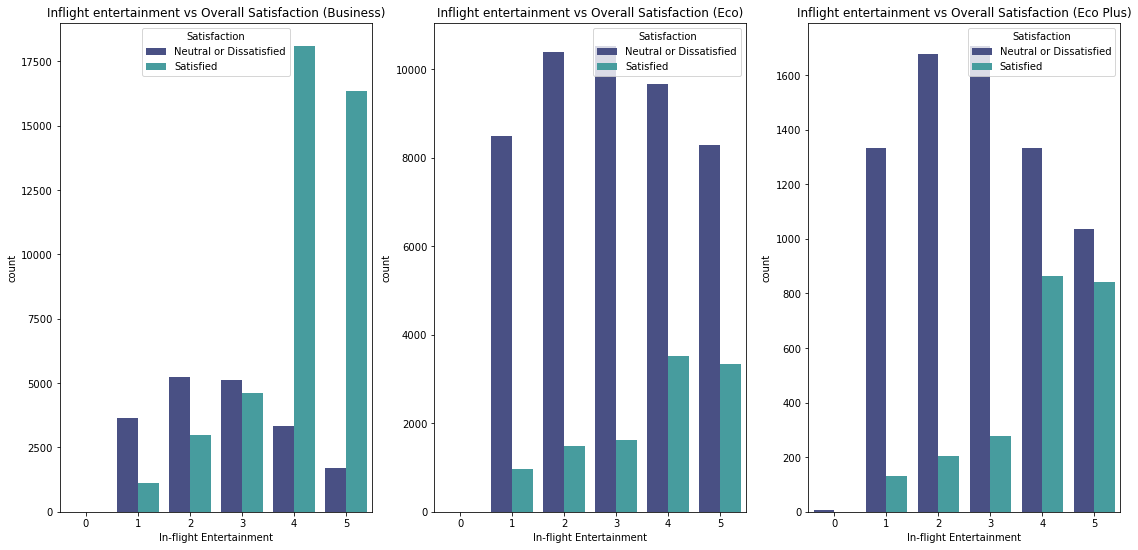

In [72]:
plt.figure(figsize=(19, 9))
plt.subplot(1, 3, 1)
ax = sns.countplot(x = 'In-flight Entertainment', hue = 'Satisfaction', palette = "mako", data = df[(df.Class == "Business")])
plt.title('Inflight entertainment vs Overall Satisfaction (Business)')
plt.subplot(1, 3, 2)
ax = sns.countplot(x = 'In-flight Entertainment', hue = 'Satisfaction', palette = "mako", data = df[(df.Class == "Economy")])
plt.title('Inflight entertainment vs Overall Satisfaction (Eco)')
plt.subplot(1, 3, 3)
ax = sns.countplot(x = 'In-flight Entertainment', hue = 'Satisfaction', palette = "mako", data = df[(df.Class == "Economy Plus")])
plt.title('Inflight entertainment vs Overall Satisfaction (Eco Plus)')

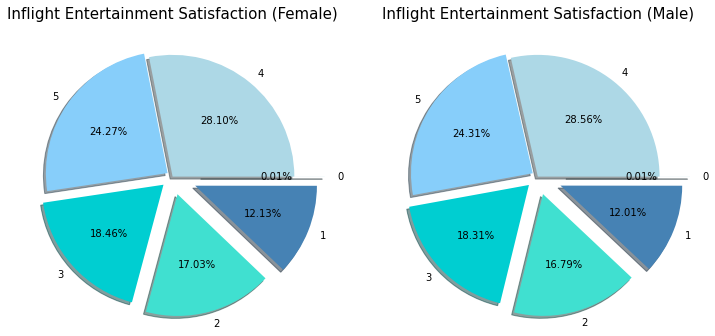

In [73]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(df.loc[df.Gender=="Female",'In-flight Entertainment'].value_counts(),  autopct='%1.2f%%', labels = df.loc[df.Gender=="Female",'In-flight Entertainment'].value_counts().index ,explode = (0,0.05,0.1,0.15,0.2,0.25), shadow=True,colors= ["lightblue","lightskyblue",'darkturquoise','turquoise','steelblue'])
plt.title('Inflight Entertainment Satisfaction (Female)', fontsize=15)

plt.subplot(1, 2, 2)
plt.pie(df.loc[df.Gender=="Male",'In-flight Entertainment'].value_counts(), autopct='%1.2f%%', labels = df.loc[df.Gender=="Male",'In-flight Entertainment'].value_counts().index, explode = (0,0.05,0.1,0.15,0.2,0.25), shadow=True,colors=["lightblue","lightskyblue",'darkturquoise','turquoise','steelblue'])
plt.title('Inflight Entertainment Satisfaction (Male)', fontsize=15)

plt.show()

Long journeys can get tedious. And around 30% of the passengers have rated the inflight entertainment as 2 or 1. Gender hasn't affected the satisfaction levels much. We can also see that passengers from the Business section have given inflight entertainment the highest rating while the other class passengers are much more dissatisfied with it. We can infer that since business class passengers have paid more, they have access to better inflight entertainment.


Recommendations:

1. Airlines can keep a few popular magazines and newspapers across aisles. Of course this extra weight should not be high.

2. Multiple inbuilt screen functionalities taking into consideration different languages for international flights; and better headphones.

3. Separating business class and economy class using proper curtains to minimize comparison and perceived discrimination.



<font color = 'red'>__How much impact does cleanliness have on overall satisfaction of passengers?__</font>

Text(0.5, 1.0, 'Cleanliness Satisfaction vs Overall Satisfaction ')

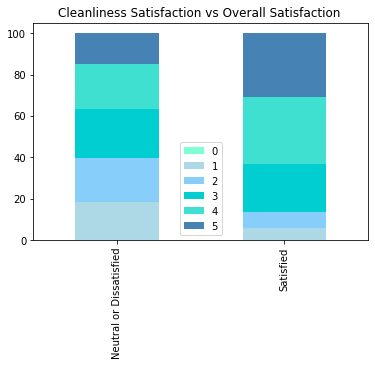

In [74]:
freq0 = df['Satisfaction'][df['Cleanliness']==0].value_counts()
freq1 = df['Satisfaction'][df['Cleanliness']==1].value_counts()
freq2 = df['Satisfaction'][df['Cleanliness']==2].value_counts()
freq3 = df['Satisfaction'][df['Cleanliness']==3].value_counts()
freq4 = df['Satisfaction'][df['Cleanliness']==4].value_counts()
freq5 = df['Satisfaction'][df['Cleanliness']==5].value_counts()
plotdata = pd.DataFrame({0:freq0, 1: freq1,2: freq2,3: freq3,4: freq4,5: freq5})
plotdata1=plotdata.div(plotdata.sum(axis=1),axis =0)*100
plotdata1.plot(kind='bar',stacked = True, color = ['aquamarine',"lightblue","lightskyblue",'darkturquoise','turquoise','steelblue'])
plt.title('Cleanliness Satisfaction vs Overall Satisfaction ')

Text(0.5, 1.0, 'Cleanliness vs Class ')

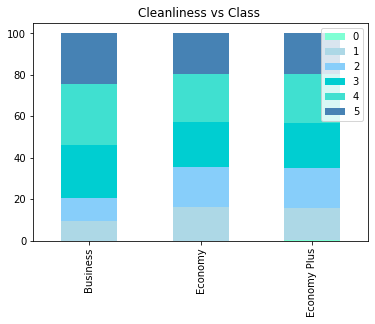

In [75]:
freq0 = df['Class'][df['Cleanliness']==0].value_counts()
freq1 = df['Class'][df['Cleanliness']==1].value_counts()
freq2 = df['Class'][df['Cleanliness']==2].value_counts()
freq3 = df['Class'][df['Cleanliness']==3].value_counts()
freq4 = df['Class'][df['Cleanliness']==4].value_counts()
freq5 = df['Class'][df['Cleanliness']==5].value_counts()
plotdata = pd.DataFrame({0:freq0, 1: freq1,2: freq2,3: freq3,4: freq4,5: freq5})
plotdata1=plotdata.div(plotdata.sum(axis=1),axis =0)*100
plotdata1.plot(kind='bar',stacked = True,color = ['aquamarine',"lightblue","lightskyblue",'darkturquoise','turquoise','steelblue'])
plt.title('Cleanliness vs Class ')

Text(0.5, 1.0, 'Cleanliness vs Overall Satisfaction (Eco Plus)')

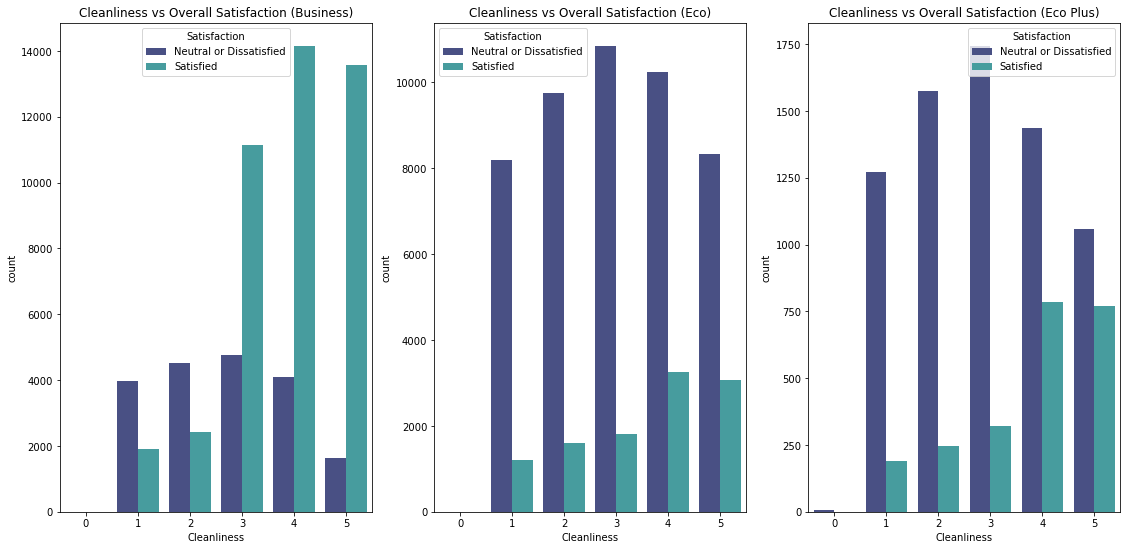

In [76]:
plt.figure(figsize=(19, 9))
plt.subplot(1, 3, 1)
ax = sns.countplot(x = 'Cleanliness', hue = 'Satisfaction', palette = "mako", data = df[(df.Class == "Business")])
plt.title('Cleanliness vs Overall Satisfaction (Business)')
plt.subplot(1, 3, 2)
ax = sns.countplot(x = 'Cleanliness', hue = 'Satisfaction', palette = "mako", data = df[(df.Class == "Economy")])
plt.title('Cleanliness vs Overall Satisfaction (Eco)')
plt.subplot(1, 3, 3)
ax = sns.countplot(x = 'Cleanliness', hue = 'Satisfaction', palette = "mako", data = df[(df.Class == "Economy Plus")])
plt.title('Cleanliness vs Overall Satisfaction (Eco Plus)')

We can see that cleanliness plays an important role to analyse how satisfied the customers are. 
The passengers from Eco and Eco Plus have reported greater inconvenience when it comes to cleanliness and hygiene.
Hygiene cannot be compromised and the airlines should maintain cleanliness to ensure comfortable inflight experience.

Recommendation:

1. Cleanliness is affected mainly by things like tissue papers, water bottles and the various wrappings and packaging used for snacks. Better to reduce the packaging of food.

2. Airlines can study the feasibility of offering snacks at check in counters before boarding in.

3. The duration of time available between flights is often too small to clean due to maximizing asset utilisation. Airlines should streamline cleaning up during flights itself by improving operational efficiency.


<font color='red'>**How does Class impact the Satisfaction of the passengers?**</font>

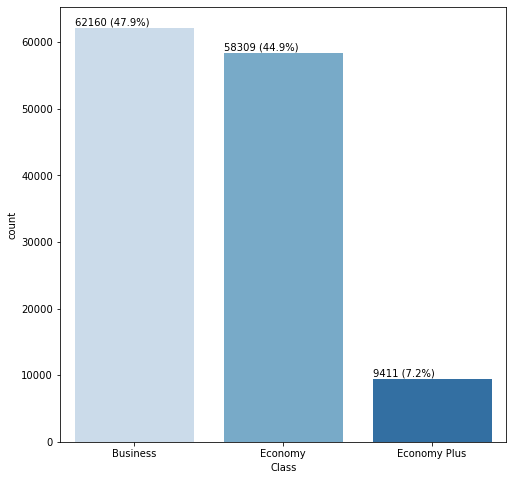

In [77]:
# Comparing how many passengers are travelling in each Class
fig = plt.figure(figsize=(8,8))

ax = sns.countplot(data=df,x='Class', palette = "Blues")
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x(), p.get_height()+400))

Majority of the passengers travel in Business Class or Economy Class with the former topping the list with 48% and latter with 45%. Less than 10% of the passengers travel through Economy Plus.

We further analyze the break up of how many passengers are satisfied in each of these classes and understand which factors are leading to the satisfaction.

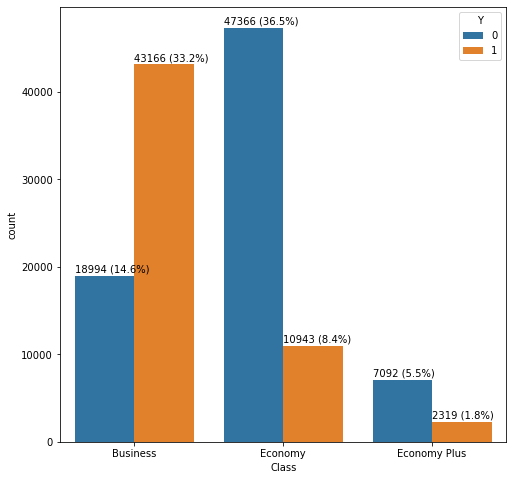

In [78]:
# Comparing how many passengers are satisfied in each Class
fig = plt.figure(figsize=(8,8))

ax = sns.countplot(data=df,x='Class', hue = "Y")
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x(), p.get_height()+400))


Majority of the passengers travelling through business class are satisfied with the services. Economy class has the highest percentage of people dissatisfied with the airline services.

To better understand the differences between the factors which are leading to satisfaction in Business Class and Economy class we analyze the "In Flight Wifi Service" as this has the highest correlation with the Satisfaction variable.

In [79]:
dftemp = df_copy

In [80]:
#Creating a new dataframe for seperating business class for average ratings

dfr4 = dftemp[(dftemp.Class == "Economy")]
x = [x for x in dfr4.columns if dfr4[x].dtypes != 'object' and x!='ID']
data_numeric_4 = dfr4[x]
data_numeric_4.drop(['Age','Flight Distance','Departure Delay','Arrival Delay','Y'], inplace= True, axis = 1)#,'Flight Distance','Departure Delay','Arrival Delay')
data_numeric_4.replace(0,np.nan, inplace = True)

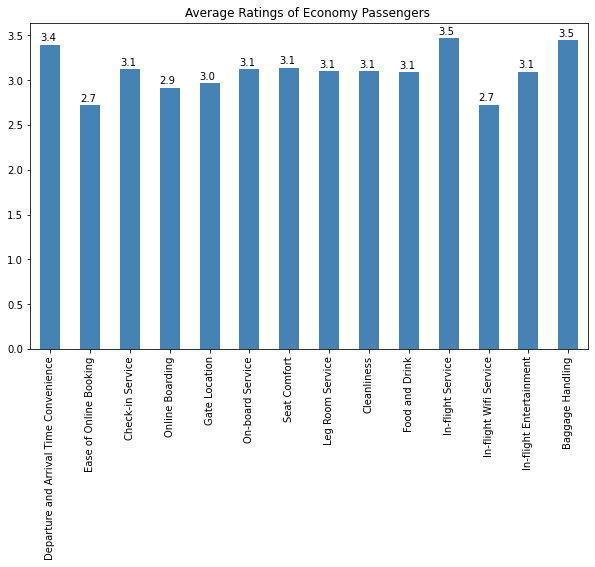

In [81]:
#Calculating the mean of the user ratings with respect to variables
fig, ax = plt.subplots(figsize=[10,6])
data_numeric_4.agg({c:['mean'] for c in data_numeric_4.columns}).loc["mean"].plot(ax=ax, kind="bar")
l = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
for p in ax.patches:
        ax.annotate(p.get_height().round(1), (p.get_x(), p.get_height()+.04))
plt.title('Average Ratings of Economy Passengers ')
for bar in ax.patches:
    
    bar.set_facecolor('#4682B4')

plt.show()

In [82]:
#Creating a new dataframe for seperating Economy class with respect to satisfaction
dfr3 = dftemp[(dftemp.Class == "Business")]
x = [x for x in dfr3.columns if dfr3[x].dtypes != 'object' and x!='ID']
data_numeric_3 = dfr3[x]
data_numeric_3.drop(['Age','Flight Distance','Departure Delay','Arrival Delay','Y'], inplace= True, axis = 1)#,'Flight Distance','Departure Delay','Arrival Delay')
data_numeric_3.replace(0,np.nan, inplace = True)

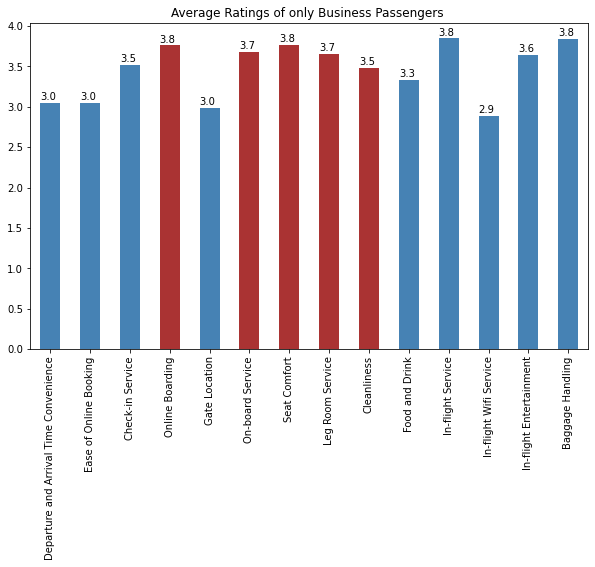

In [83]:
#Calculating the mean of the user ratings with respect to variables

fig, ax = plt.subplots(figsize=[10,6])
data_numeric_3.agg({c:['mean'] for c in data_numeric_3.columns}).loc["mean"].plot(ax=ax, kind="bar")
l = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
for p in ax.patches:
        ax.annotate(p.get_height().round(1), (p.get_x(), p.get_height()+.04))
plt.title('Average Ratings of only Business Passengers ')
for bar in ax.patches:
    
    bar.set_facecolor('#4682B4')

#lit = 0
#pos = data_numeric_3.index.get_loc(lit)

#ax.patches[pos].set_facecolor('#aa3333')

lit = 3
pos = data_numeric_3.index.get_loc(lit)

ax.patches[pos].set_facecolor('#aa3333')
lit = 5
pos = data_numeric_3.index.get_loc(lit)

ax.patches[pos].set_facecolor('#aa3333')

lit = 6
pos = data_numeric_3.index.get_loc(lit)

ax.patches[pos].set_facecolor('#aa3333')


lit = 7
pos = data_numeric_3.index.get_loc(lit)

ax.patches[pos].set_facecolor('#aa3333')
lit = 8
pos = data_numeric_3.index.get_loc(lit)

ax.patches[pos].set_facecolor('#aa3333')






plt.show()

<font color='red'>**How does the Customer Type impact the satisfaction level.**</font>

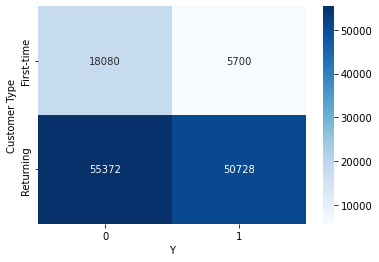

In [84]:
#creating Heat map to check the number of passengers in each category
sns.heatmap(pd.crosstab(df['Customer Type'], df['Y']),annot=True, cmap='Blues', cbar=True, fmt="d");

Around 80% of the airline passengers are returning passengers, out of which the passenger are split equally between "Satisfied" and "Neutral or Dissatisfied" with the latter slightly more than the former. 

76% of the First-time Passengers are not satisfied with the airline services. We compare the ratings given by the First-time and the returning passengers to check which services should the airlines improve to provide a better satisfaction.

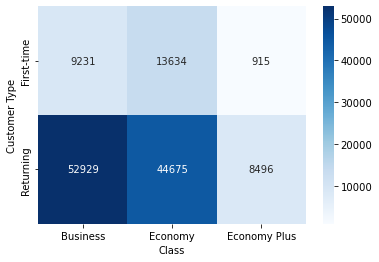

In [85]:
#creating Heat map to check the number of passengers in each category with respect to class
sns.heatmap(pd.crosstab(df['Customer Type'], df['Class']),annot=True, cmap='Blues', cbar=True, fmt="d");


In [86]:
#Create a back up dataframe and modifying the column name to use in the next part of the graph
dftemp=df_copy
dftemp = dftemp.rename(columns={"Customer Type":"Customer_Type"})

In [87]:
#Creating a new dataframe with the condition that customer type is returning and dropping categorical variables.
dfr3 = dftemp[(dftemp["Customer_Type"] == "Returning")]
x = [x for x in dfr3.columns if dfr3[x].dtypes != 'object' and x!='ID']
data_numeric_3 = dfr3[x]
data_numeric_3.drop(['Age','Flight Distance','Departure Delay','Arrival Delay','Y'], inplace= True, axis = 1)#,'Flight Distance','Departure Delay','Arrival Delay')
data_numeric_3.replace(0,np.nan, inplace = True)

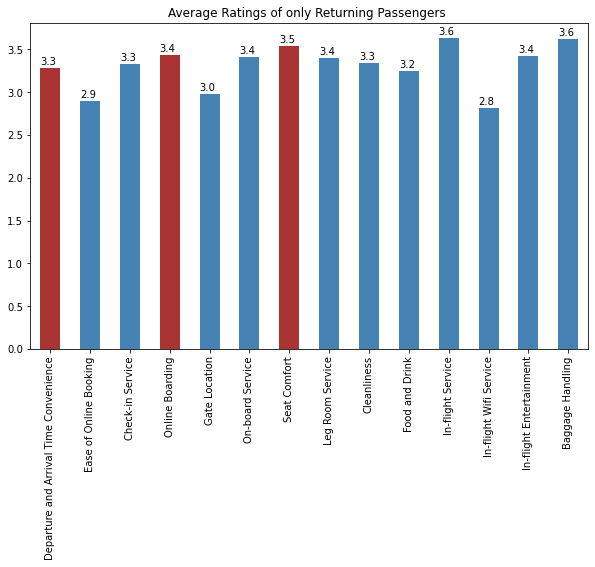

In [88]:
#Calculating the mean of the user ratings with respect to variables

fig, ax = plt.subplots(figsize=[10,6])
data_numeric_3.agg({c:['mean'] for c in data_numeric_3.columns}).loc["mean"].plot(ax=ax, kind="bar")
l = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
for p in ax.patches:
        ax.annotate(p.get_height().round(1), (p.get_x(), p.get_height()+.04))
plt.title('Average Ratings of only Returning Passengers ')
for bar in ax.patches:
    
    bar.set_facecolor('#4682B4')

lit = 1
pos = data_numeric_3.index.get_loc(lit)

ax.patches[pos].set_facecolor('#aa3333')

lit = 4
pos = data_numeric_3.index.get_loc(lit)

ax.patches[pos].set_facecolor('#aa3333')

lit = 7
pos = data_numeric_3.index.get_loc(lit)

ax.patches[pos].set_facecolor('#aa3333')



plt.show()

In [89]:
#Creating a new dataframe with the condition that customer type is First time and dropping categorical variables.

dfr4 = dftemp[(dftemp["Customer_Type"] == "First-time")]
x = [x for x in dfr4.columns if dfr4[x].dtypes != 'object' and x!='ID']
data_numeric_4 = dfr4[x]
data_numeric_4.drop(['Age','Flight Distance','Departure Delay','Arrival Delay','Y'], inplace= True, axis = 1)#,'Flight Distance','Departure Delay','Arrival Delay')
data_numeric_4.replace(0,np.nan, inplace = True)

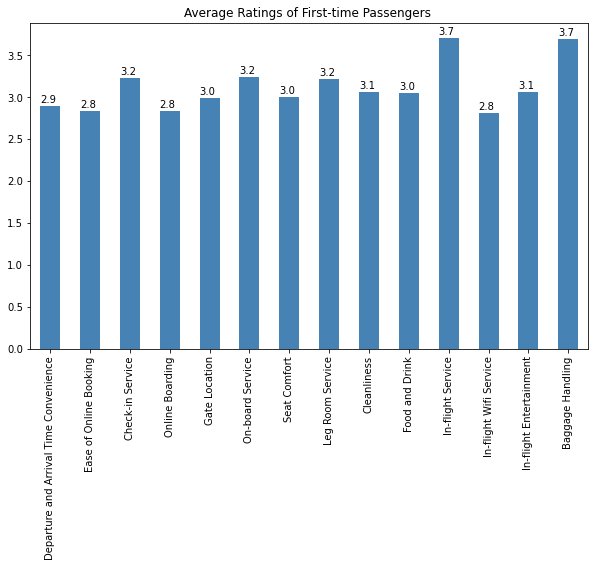

In [90]:
##Calculating the mean of the user ratings with respect to variables
fig, ax = plt.subplots(figsize=[10,6])
data_numeric_4.agg({c:['mean'] for c in data_numeric_4.columns}).loc["mean"].plot(ax=ax, kind="bar")
l = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
for p in ax.patches:
        ax.annotate(p.get_height().round(1), (p.get_x(), p.get_height()+.04))
plt.title('Average Ratings of First-time Passengers ')
for bar in ax.patches:
    
    bar.set_facecolor('#4682B4')

plt.show()

Returning Passengers rated Departure and arrival time more than the First-timers, and the majority of the passengers are travelling for Business type so it could be possible that the airlines is scheduling flights in accordance to the Business hours.

Also Returning Passengers are more comfortable with the Leg room service and seat comfort compared to the First-timers. 

There is a significant difference between the online boarding rating between the first-timers and the returning, since the latter portion of passengers are already aware of the online boarding they are more comfortable. 






<font color='red'>__How does satisfaction vary accross different Age Groups?__


In [91]:
#Classifying age into different buckets of Age Group
bins=[5,15,25,50,85]
labels=['Teens','GenZs','Millennials','Old']
df['AgeGroup']=pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.head()

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  Cleanliness  Food and Drink  In-flight Service  \
0  ...            5               5                  5   
1  ...            5               3                  5   
2  ...            5               5                  3   
3  ...            4               4                  5   
4  ...            5               4                  3   

   In-flight Wifi Service  In-flight Entertainment  Baggage Handling  \
0                       3                        5                 5   
1                       2                        5                 5   
2                       4                        3                 3   
3                       2                        5                 5   
4                       3                        3                 3   

              Satisfaction  Y     AgeGroup  Arrival Delay bin  
0  Neutral or Dissatisfied  0  Millennials            [5, 10)  
1                Satisfied  1  Millennials           [20, 60)  
2                Satisfied  1  Millennials             [0, 5)  
3                Satisfied  1          Old             [0, 5)  
4                Satisfied  1  Millennials             [0, 5)  

[5 rows x 27 columns]

In [92]:
#Creating a pivot table of percent satisfied customers for the pre-defined Age Group buckets
df_age_pivot=df.groupby('AgeGroup')['Y'].agg(['sum','count'])
df_age_pivot['Not Satisfied']=df_age_pivot['count']-df_age_pivot['sum']
df_age_pivot['perc_Satisfied']=round((df_age_pivot['sum']/df_age_pivot['count'])*100,2)
df_age_pivot.rename(columns={'count': 'Population','sum':'Satisfied'}, inplace=True)
df_age_pivot.reset_index(inplace=True)
df_age_pivot

AgeGroup  Satisfied  Population  Not Satisfied  perc_Satisfied
0        Teens        905        6460           5555           14.01
1        GenZs       5936       18202          12266           32.61
2  Millennials      32557       69037          36480           47.16
3          Old      17024       36156          19132           47.08

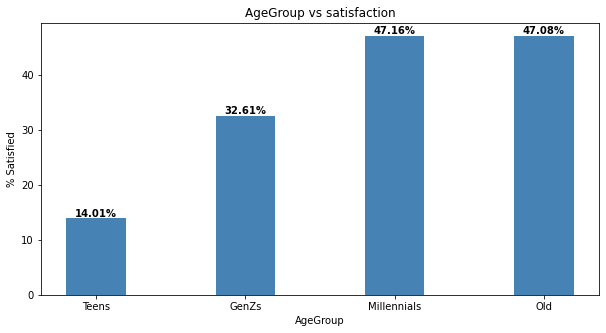

In [93]:
#Ploting bar chart of %Satisfied customers vs Age Group
fig = plt.figure(figsize = (10, 5))
graph = plt.bar(df_age_pivot['AgeGroup'].astype(str), df_age_pivot['perc_Satisfied'], color ='steelblue', width = 0.4)
plt.xlabel("AgeGroup")
plt.ylabel("% Satisfied")
plt.title("AgeGroup vs satisfaction")
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(df_age_pivot.perc_Satisfied[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

In [94]:
#Filtering out only the ratings columns
bins=[5,15,25,45,80]
labels=['Teens','GenZs','Millennials','Old']
data_numeric['AgeGroup']=pd.cut(data_numeric['Age'], bins=bins, labels=labels, right=False)
rating_sub=data_numeric.drop(columns=["Age","Flight Distance","Departure Delay","Arrival Delay"])

In [95]:
#Creating separate dataframes for each age group by subsetting df
teen_sub=df[df["AgeGroup"]=="Teens"]
genz_sub=df[df["AgeGroup"]=="GenZs"]
mill_sub=df[df["AgeGroup"]=="Millennials"]
old_sub=df[df["AgeGroup"]=="Old"]
rating_sub.head()

Departure and Arrival Time Convenience  Ease of Online Booking  \
0                                       3                       3   
1                                       2                       2   
2                                       4                       4   
3                                       2                       2   
4                                       3                       3   

   Check-in Service  Online Boarding  Gate Location  On-board Service  \
0                 4                3              3                 3   
1                 3                5              2                 5   
2                 4                5              4                 3   
3                 3                4              2                 5   
4                 3                5              3                 3   

   Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
0             5                 2            5               5   
1             4                 5            5               3   
2             5                 3            5               5   
3             5                 5            4               4   
4             4                 4            5               4   

   In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
0                  5                       3                        5   
1                  5                       2                        5   
2                  3                       4                        3   
3                  5                       2                        5   
4                  3                       3                        3   

   Baggage Handling     AgeGroup  
0                 5          Old  
1                 5  Millennials  
2                 3  Millennials  
3                 5          Old  
4                 3          Old

We can infer from the graph that elder people are more satisfied of the airline services than the younger crowd.

We will dig deeper to check which particular services are the younger audience unhappy with.

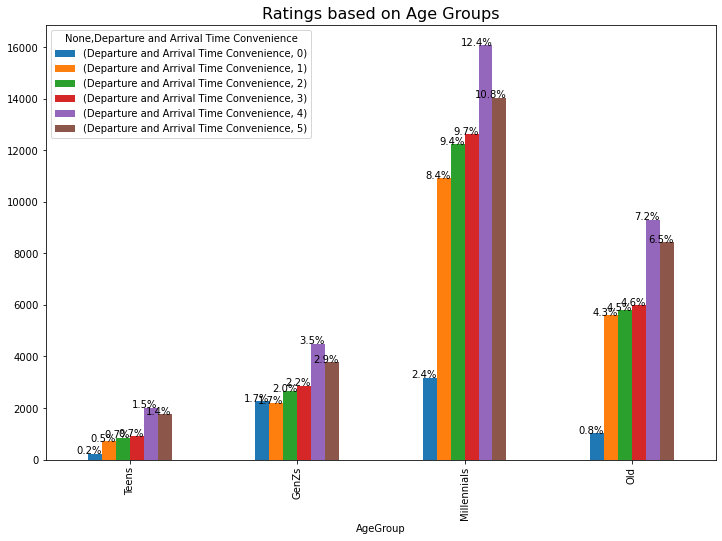

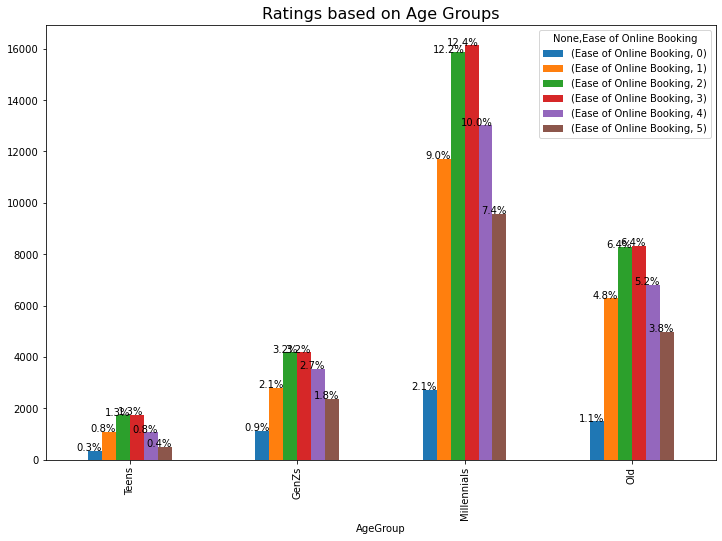

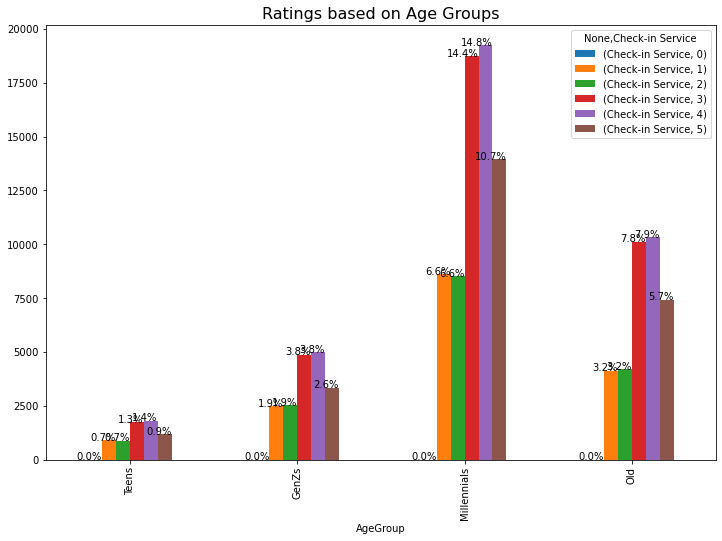

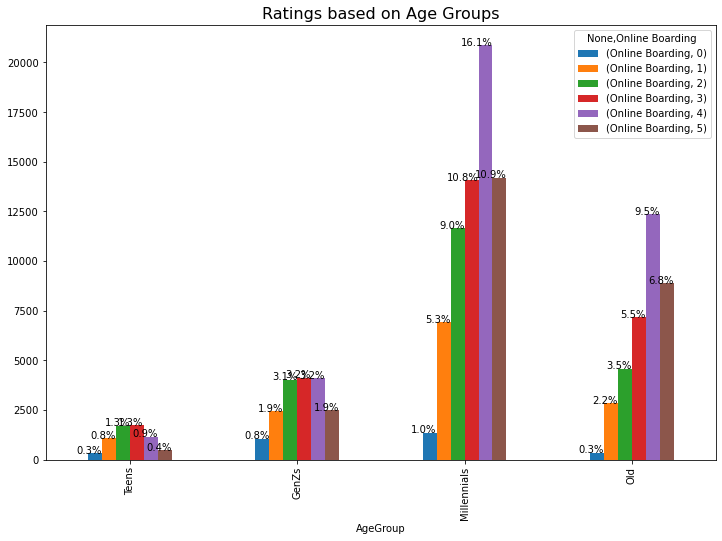

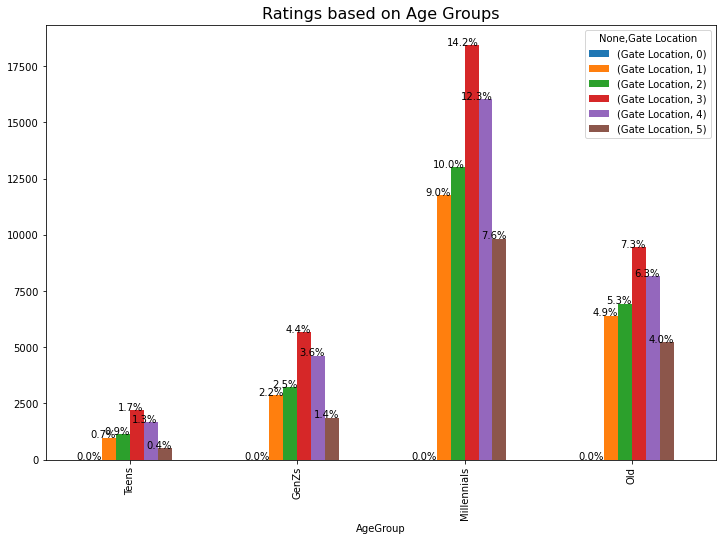

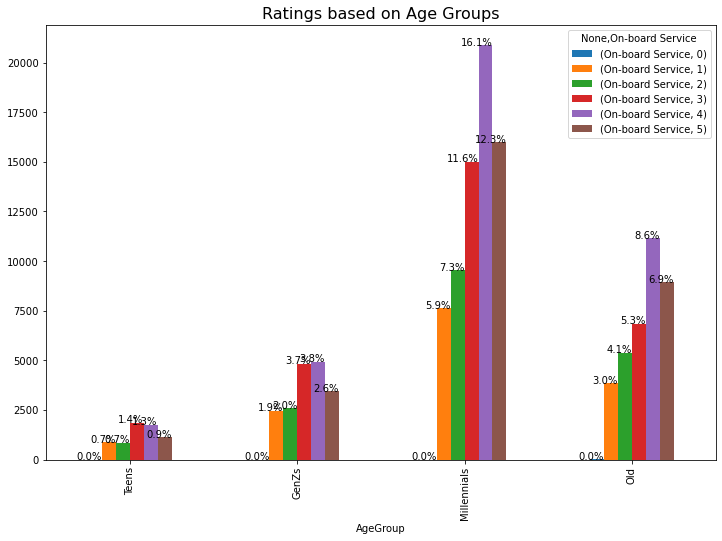

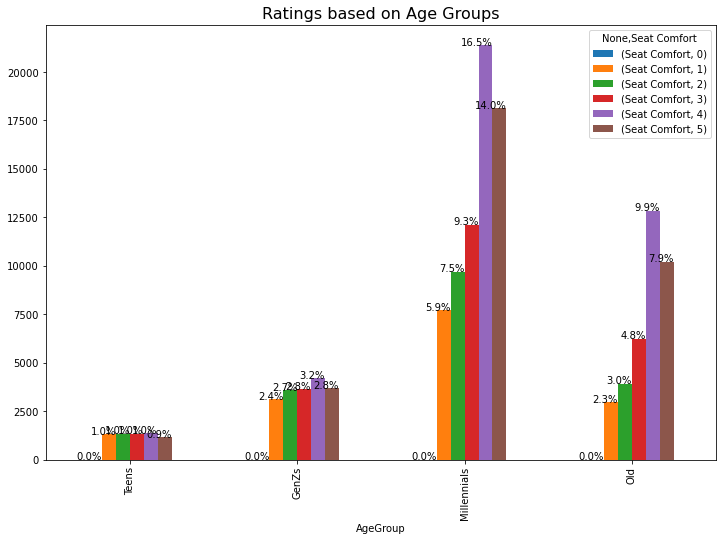

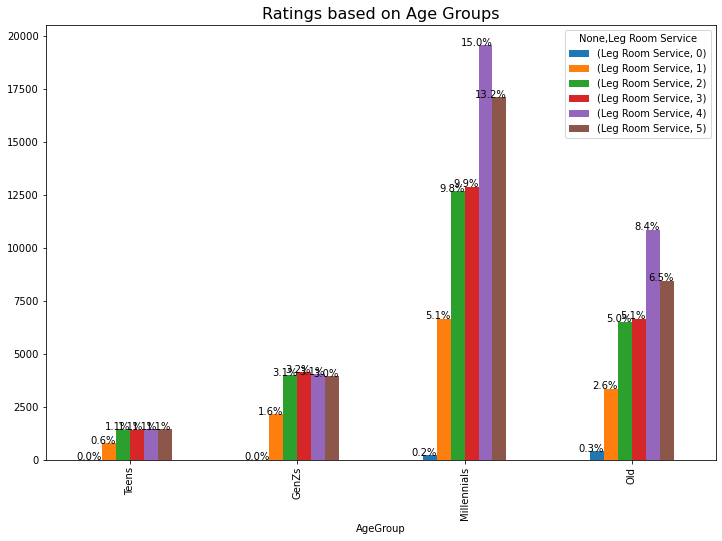

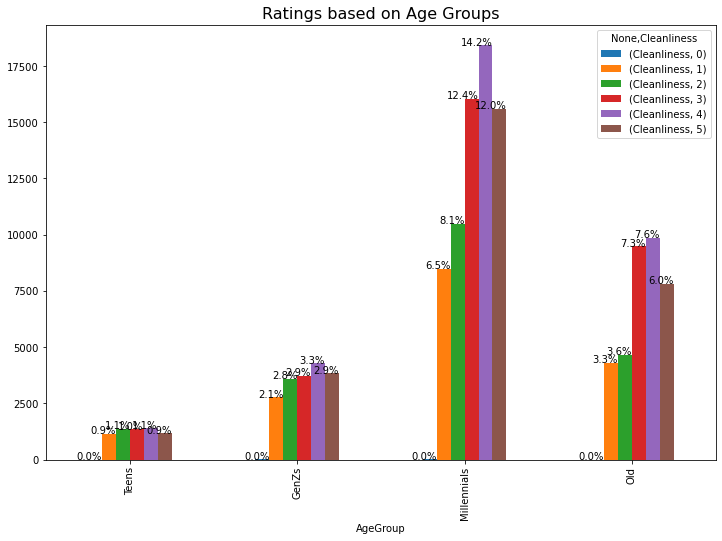

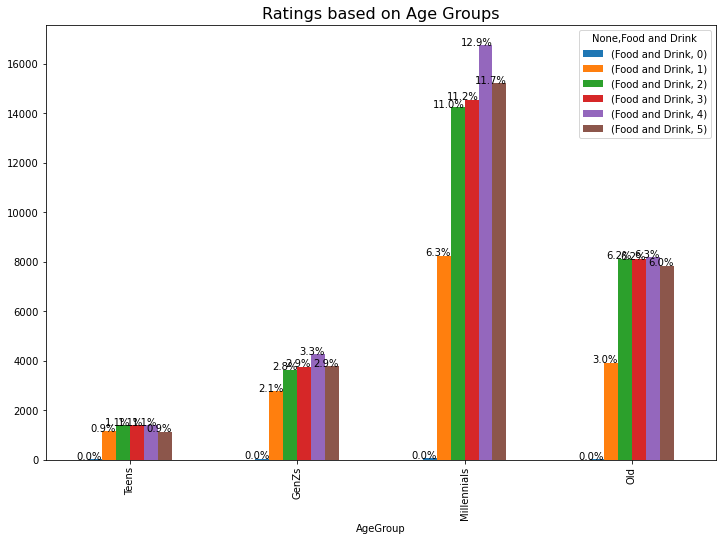

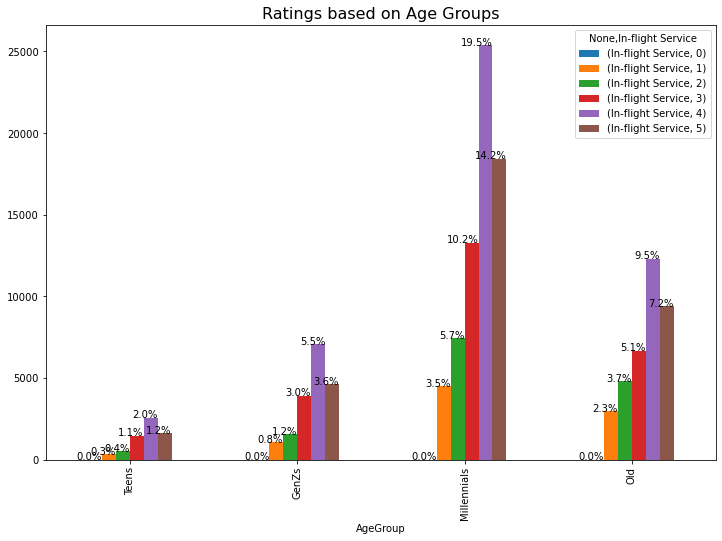

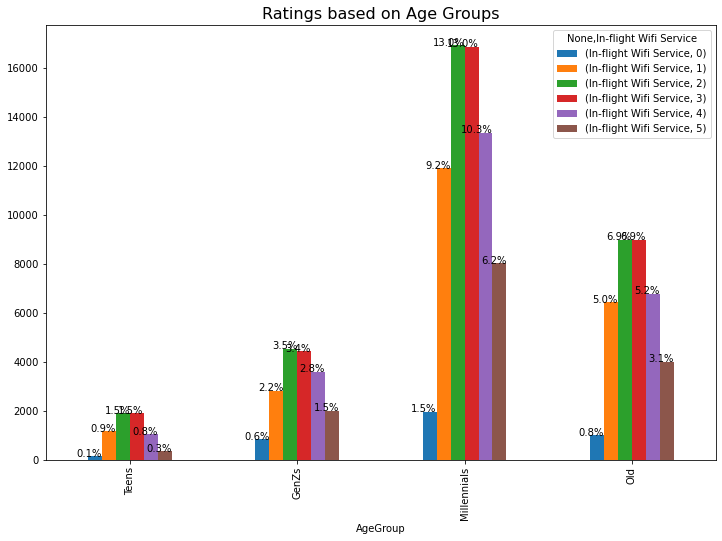

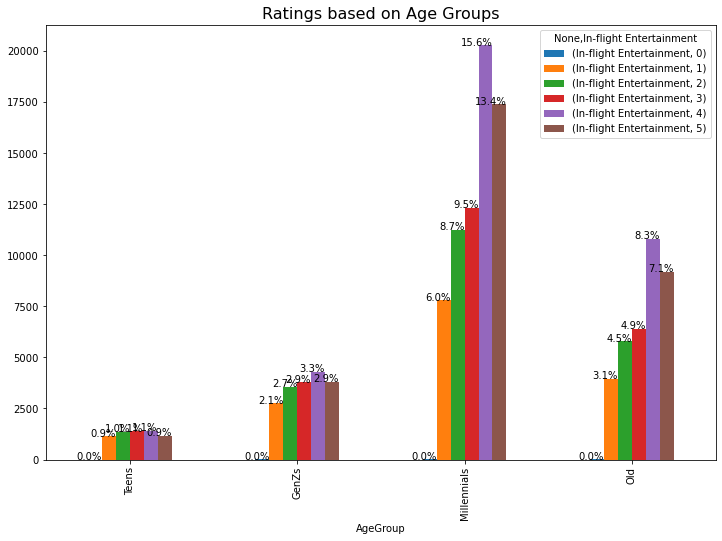

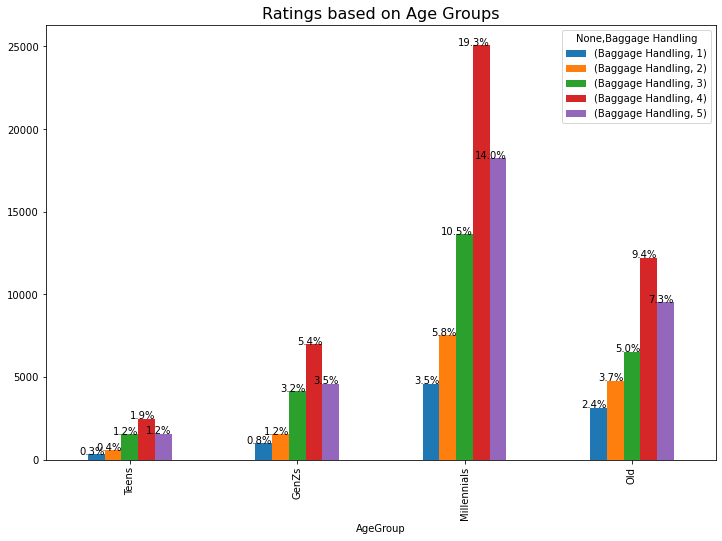

In [96]:
#Plotting graphs for each service against Age group with % annotations
reqd=rating_sub.drop(columns=["AgeGroup"])
for i in reqd.columns:
    table3=df.pivot_table(index=["AgeGroup"],columns=[i],aggfunc={i:"count"})
    ax = table3.plot(kind="bar",figsize=(12,8))
    plt.title('Ratings based on Age Groups', fontsize=16)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/129880)
        x, y = p.get_x() + p.get_width(), p.get_height()
        ax.annotate(percentage, (x, y), ha='right')
    plt.show()

__Ease of online booking:__

We can infer that all age groups are equally unhappy with the online booking service with most people rating it as 2 or 3.

__Check-in Service:__

Check-in services are not at par as most people accross the age groups have rated it either 3 or 4 thereby being either neutral or unsatisfied. The airline can increase the number of check-in desks at airports or start a web check-in feature on their application to make it easy for the customers.



__Online boarding:__

GenZs in particular dont seem to like the online boarding service with maximum people in the group giving it a 2, 3 or a 4.



__Gate location:__

Millennials have rated the airline services 4/5 more often than not. They are particularly not pleased abouth the gate location.


__Seat comfort and Leg-Room:__

GenZs are not very fond of leg room offered and dont think the seats are comfortable too.


__Cleanliness and baggage handling:__

Baggage handlingand cleanliness looks like their strongest suite and  should make minimal changes in that category.


__In-flight services:__

In flight wifi services also seem to be a common disappointment for all age groups which can be taken care of by the airline management or IT services.

<font color='red'>__Grouping Flight distance into bins and measuring for average passenger ratings__</font>

In [97]:
#Grouping flight Distance into interval groups.

df['Flight Distance bin']= pd.cut(x=df['Flight Distance'], bins=[0, 200, 400, 600, 800, 1000, 2000, 3000, 4000, 5000], right=False)
df.head()

#Calculating %Satisfied based on the flight distance bins
df_flight_distance_pivot = df.groupby('Flight Distance bin')['Y'].agg(['sum','count'])
df_flight_distance_pivot['Not satisfied']=df_flight_distance_pivot['count']-df_flight_distance_pivot['sum']
df_flight_distance_pivot['% Satisfied']=round((df_flight_distance_pivot['sum']/df_flight_distance_pivot['count'])*100,2)
df_flight_distance_pivot.rename(columns={'count': 'Population','sum':'Satisfied'}, inplace=True)
df_flight_distance_pivot.reset_index(inplace=True)
df_flight_distance_pivot

Flight Distance bin  Satisfied  Population  Not satisfied  % Satisfied
0            [0, 200)       3092        8776           5684        35.23
1          [200, 400)       7248       21563          14315        33.61
2          [400, 600)       6235       19151          12916        32.56
3          [600, 800)       4176       13027           8851        32.06
4         [800, 1000)       4079       12572           8493        32.45
5        [1000, 2000)      12855       27910          15055        46.06
6        [2000, 3000)      10754       16554           5800        64.96
7        [3000, 4000)       7935       10237           2302        77.51
8        [4000, 5000)         54          90             36        60.00

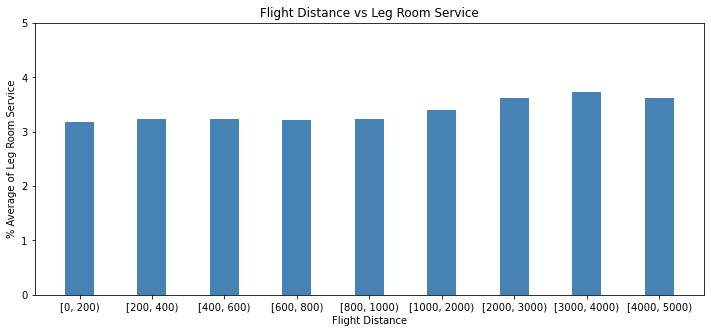

In [98]:
#Flight Distance vs Leg Room Service

#lst=["Leg Room Service", "Food and Drink", "Seat Comfort", "On-board Service", "In-flight Service", "In-flight Wifi Service", "In-flight Entertainment"]
#for x in lst:
df_fdist_pivot = df.groupby('Flight Distance bin')["Leg Room Service"].agg(['mean'])
df_fdist_pivot.rename(columns={'mean': 'Average'}, inplace=True)
df_fdist_pivot.reset_index(inplace=True)
df_fdist_pivot

fig = plt.figure(figsize = (12, 5))
plt.bar(df_fdist_pivot['Flight Distance bin'].astype(str),df_fdist_pivot['Average'], color ='steelblue', width = 0.4,)
plt.xlabel("Flight Distance")
plt.ylabel("% Average of Leg Room Service")
plt.title("Flight Distance vs Leg Room Service")
plt.ylim([0,5])
plt.show()

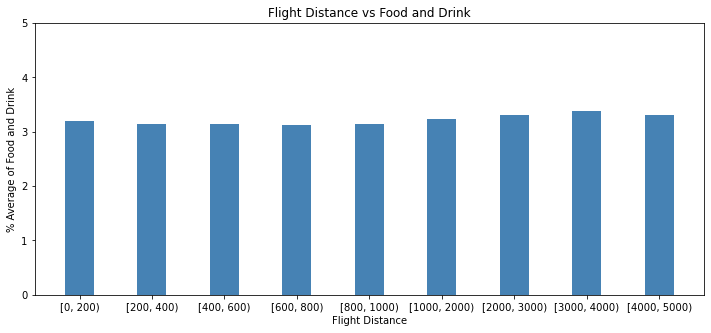

In [99]:
#Flight Distance vs Food and Drink

#lst=["Leg Room Service", "Food and Drink", "Seat Comfort", "On-board Service", "In-flight Service", "In-flight Wifi Service", "In-flight Entertainment"]
#for x in lst:
df_fdist_pivot = df.groupby('Flight Distance bin')["Food and Drink"].agg(['mean'])
df_fdist_pivot.rename(columns={'mean': 'Average'}, inplace=True)
df_fdist_pivot.reset_index(inplace=True)
df_fdist_pivot

fig = plt.figure(figsize = (12, 5))
plt.bar(df_fdist_pivot['Flight Distance bin'].astype(str),df_fdist_pivot['Average'], color ='steelblue', width = 0.4)
plt.xlabel("Flight Distance")
plt.ylabel("% Average of Food and Drink")
plt.title("Flight Distance vs Food and Drink")
plt.ylim([0,5])
plt.show()

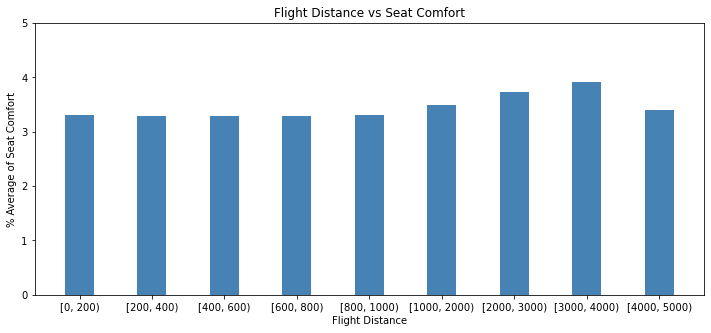

In [100]:
#Flight Distance vs Seat Comfort

#lst=["Leg Room Service", "Food and Drink", "Seat Comfort", "On-board Service", "In-flight Service", "In-flight Wifi Service", "In-flight Entertainment"]
#for x in lst:
df_fdist_pivot = df.groupby('Flight Distance bin')["Seat Comfort"].agg(['mean'])
df_fdist_pivot.rename(columns={'mean': 'Average'}, inplace=True)
df_fdist_pivot.reset_index(inplace=True)
df_fdist_pivot

fig = plt.figure(figsize = (12, 5))
plt.bar(df_fdist_pivot['Flight Distance bin'].astype(str),df_fdist_pivot['Average'], color ='steelblue', width = 0.4)
plt.xlabel("Flight Distance")
plt.ylabel("% Average of Seat Comfort")
plt.title("Flight Distance vs Seat Comfort")
plt.ylim([0,5])
plt.show()

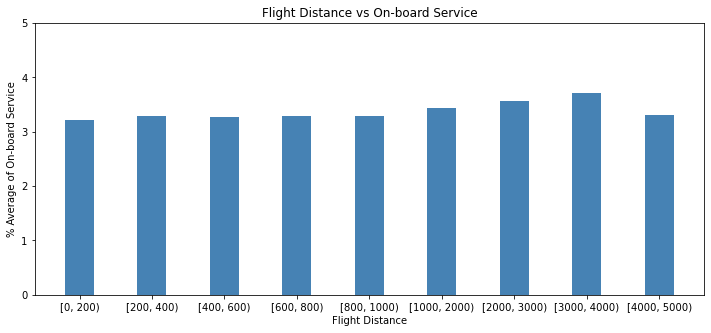

In [101]:
#Flight Distance vs On-board Service

#lst=["Leg Room Service", "Food and Drink", "Seat Comfort", "On-board Service", "In-flight Service", "In-flight Wifi Service", "In-flight Entertainment"]
#for x in lst:
df_fdist_pivot = df.groupby('Flight Distance bin')["On-board Service"].agg(['mean'])
df_fdist_pivot.rename(columns={'mean': 'Average'}, inplace=True)
df_fdist_pivot.reset_index(inplace=True)
df_fdist_pivot

fig = plt.figure(figsize = (12, 5))
plt.bar(df_fdist_pivot['Flight Distance bin'].astype(str),df_fdist_pivot['Average'], color ='steelblue', width = 0.4)
plt.xlabel("Flight Distance")
plt.ylabel("% Average of On-board Service")
plt.title("Flight Distance vs On-board Service")
plt.ylim([0,5])
plt.show()

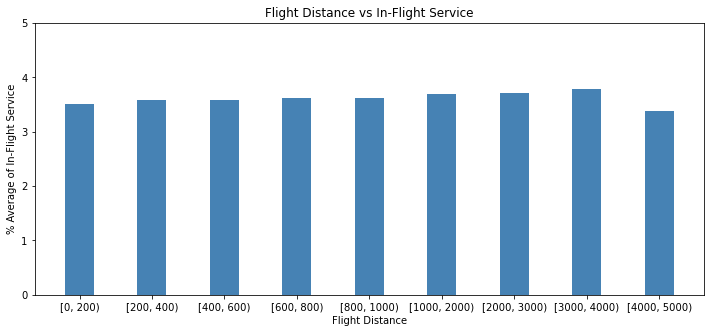

In [102]:
#Flight Distance vs In-flight Service

#lst=["Leg Room Service", "Food and Drink", "Seat Comfort", "On-board Service", "In-flight Service", "In-flight Wifi Service", "In-flight Entertainment"]
#for x in lst:
df_fdist_pivot = df.groupby('Flight Distance bin')["In-flight Service"].agg(['mean'])
df_fdist_pivot.rename(columns={'mean': 'Average'}, inplace=True)
df_fdist_pivot.reset_index(inplace=True)
df_fdist_pivot

fig = plt.figure(figsize = (12, 5))
plt.bar(df_fdist_pivot['Flight Distance bin'].astype(str),df_fdist_pivot['Average'], color ='steelblue', width = 0.4)
plt.xlabel("Flight Distance")
plt.ylabel("% Average of In-Flight Service")
plt.title("Flight Distance vs In-Flight Service")
plt.ylim([0,5])
plt.show()

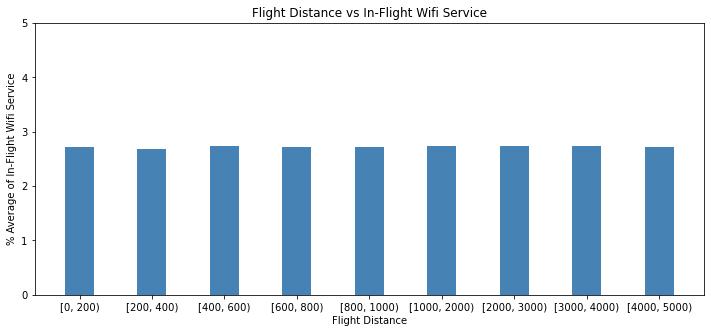

In [103]:
#Flight Distance vs In-flight Wifi Service

#lst=["Leg Room Service", "Food and Drink", "Seat Comfort", "On-board Service", "In-flight Service", "In-flight Wifi Service", "In-flight Entertainment"]
#for x in lst:
df_fdist_pivot = df.groupby('Flight Distance bin')["In-flight Wifi Service"].agg(['mean'])
df_fdist_pivot.rename(columns={'mean': 'Average'}, inplace=True)
df_fdist_pivot.reset_index(inplace=True)
df_fdist_pivot

fig = plt.figure(figsize = (12, 5))
plt.bar(df_fdist_pivot['Flight Distance bin'].astype(str),df_fdist_pivot['Average'], color ='steelblue', width = 0.4)
plt.xlabel("Flight Distance")
plt.ylabel("% Average of In-Flight Wifi Service")
plt.title("Flight Distance vs In-Flight Wifi Service")
plt.ylim([0,5])
plt.show()

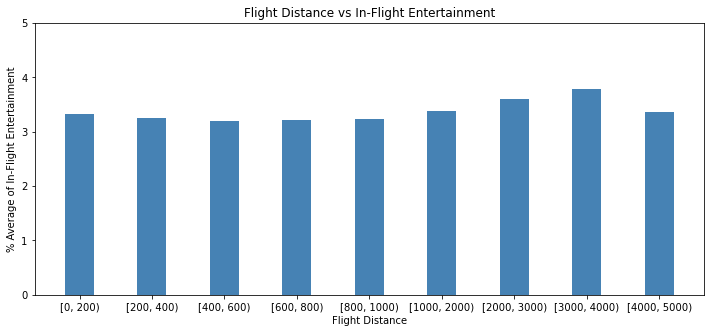

In [104]:
#Flight Distance vs In-flight Entertainment

#lst=["Leg Room Service", "Food and Drink", "Seat Comfort", "On-board Service", "In-flight Service", "In-flight Wifi Service", "In-flight Entertainment"]
#for x in lst:
df_fdist_pivot = df.groupby('Flight Distance bin')["In-flight Entertainment"].agg(['mean'])
df_fdist_pivot.rename(columns={'mean': 'Average'}, inplace=True)
df_fdist_pivot.reset_index(inplace=True)
df_fdist_pivot

fig = plt.figure(figsize = (12, 5))
plt.bar(df_fdist_pivot['Flight Distance bin'].astype(str),df_fdist_pivot['Average'], color ='steelblue', width = 0.4)
plt.xlabel("Flight Distance")
plt.ylabel("% Average of In-Flight Entertainment")
plt.title("Flight Distance vs In-Flight Entertainment")
plt.ylim([0,5])
plt.show()

As we can see from the above graphs, passengers flying for longer distances have liked the Leg room , Seat comfort, On-Board service and In-flight entertainment. The point of concern is the rating of the passengers for the In - Flight Wifi service. This rating averages out to 2.75 , irrespective of the distance flown. A suggestion for the airline would be to increase the coverage/speed of the internet connectivity, as a constant rating across distances suggests that the passengers do not run out of internet, but are overall dissatisfied with the speed. The process of creating a ‘connected airplane’ is changing. Many airlines are continuing to upgrade aircraft fleets for satcom and wifi connectivity, while new-build airliners are increasingly delivered either equipped with IFEC suites, or provisioned ready to accept them with minimal modification.

In [105]:
fig = px.sunburst(df,path=['Customer Type','Type of Travel','Class','Y'])
fig.update_traces(textinfo="label+percent parent")
fig.show()